In [11]:
# !pip install DecisionBoundaryDisplay

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import os
from sklearn.ensemble import IsolationForest
import warnings
import module as md

In [13]:
warnings.filterwarnings('ignore')

In [14]:
os.getcwd()

'D:\\jupyter\\01_Sangwoo_Project\\03_Project\\03_GyengnamTP\\03_Collecting_data\\07_FS_apply_AD'

In [15]:
file_list = os.listdir('D:/jupyter/01_Sangwoo_Project/03_Project/03_GyengnamTP/03_Collecting_data/07_FS_apply_AD')
file_list

['.ipynb_checkpoints',
 'data_extract_result_preprocessing_data.csv',
 'IF_training_model.pkl',
 'module.py',
 'multivariable_AD.ipynb',
 '__pycache__']

In [16]:
[file_csv for file_csv in file_list if file_csv.endswith('.csv')]

['data_extract_result_preprocessing_data.csv']

In [17]:
df = pd.read_csv('data_extract_result_preprocessing_data.csv', index_col = 0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29261717 entries, 369883 to 40032258
Data columns (total 19 columns):
 #   Column           Dtype  
---  ------           -----  
 0   datetime         object 
 1   shot_no          float64
 2   tool_number      float64
 3   current_spindle  int64  
 4   current_x        float64
 5   current_z        float64
 6   vibration        int64  
 7   rpm              float64
 8   rpm_set          float64
 9   feed             float64
 10  feed_set         float64
 11  load_1           float64
 12  servo_load_x     float64
 13  servo_load_z     float64
 14  servo_current_x  float64
 15  servo_current_z  float64
 16  tool_state       float64
 17  tool             float64
 18  real_shot        int64  
dtypes: float64(15), int64(3), object(1)
memory usage: 4.4+ GB


In [20]:
df['tool_number'].value_counts()

101.0     14220269
1111.0     4123871
505.0      3904643
909.0      3716019
707.0      2435004
303.0       691478
700.0        40198
1100.0       35092
300.0        26747
100.0        26701
900.0        20461
500.0        18524
0.0            601
599.0          411
399.0          391
799.0          390
1199.0         341
999.0          316
199.0          260
Name: tool_number, dtype: int64

In [21]:
df_mod1 = df.copy()
df_mod1 = df_mod1[df_mod1['tool'] == 5]

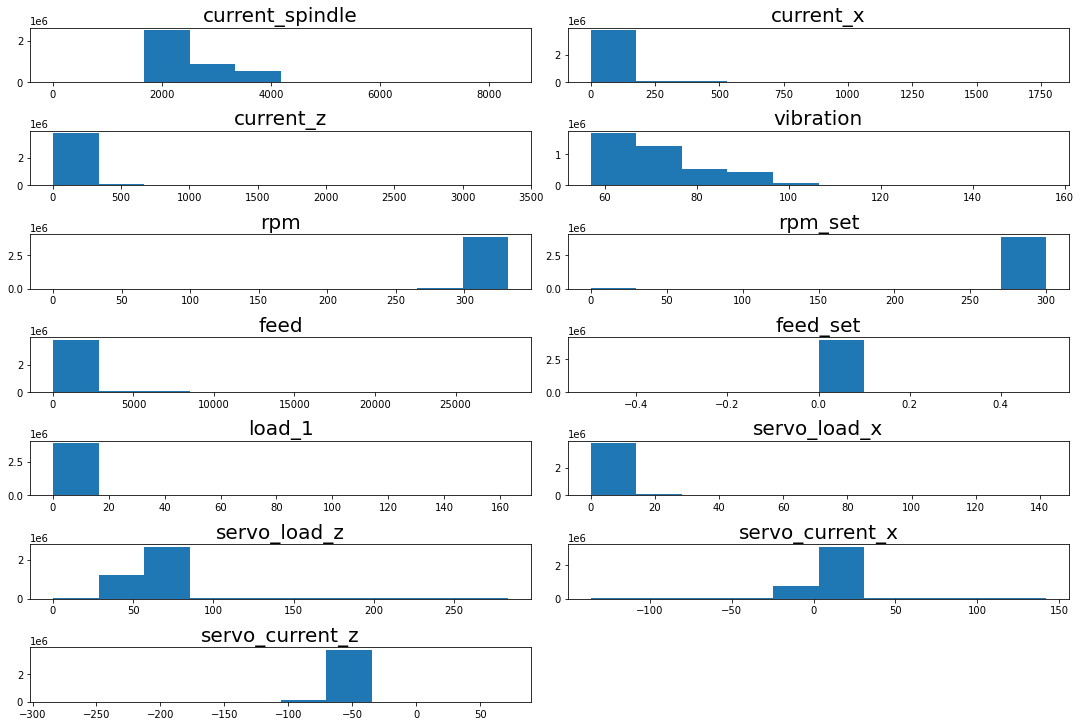

In [22]:
temp_df_mod1 = df_mod1.drop(['datetime', 'shot_no', 'real_shot', 'tool', 'tool_number', 'tool_state'], axis = 1).dropna(axis = 0)
temp_col = temp_df_mod1.columns

fig = plt.figure(figsize = (15,20))

# histogram
for idx_hist in range(0, len(temp_col)):
    globals()['ax_{}'.format(idx_hist)] = fig.add_subplot(round(len(temp_col)+1/2),2,(idx_hist+1))
    globals()['ax_{}'.format(idx_hist)].hist(temp_df_mod1[temp_col[idx_hist]])
    globals()['ax_{}'.format(idx_hist)].set_title('{}'.format(temp_col[idx_hist]), fontsize = 20)
fig.tight_layout()

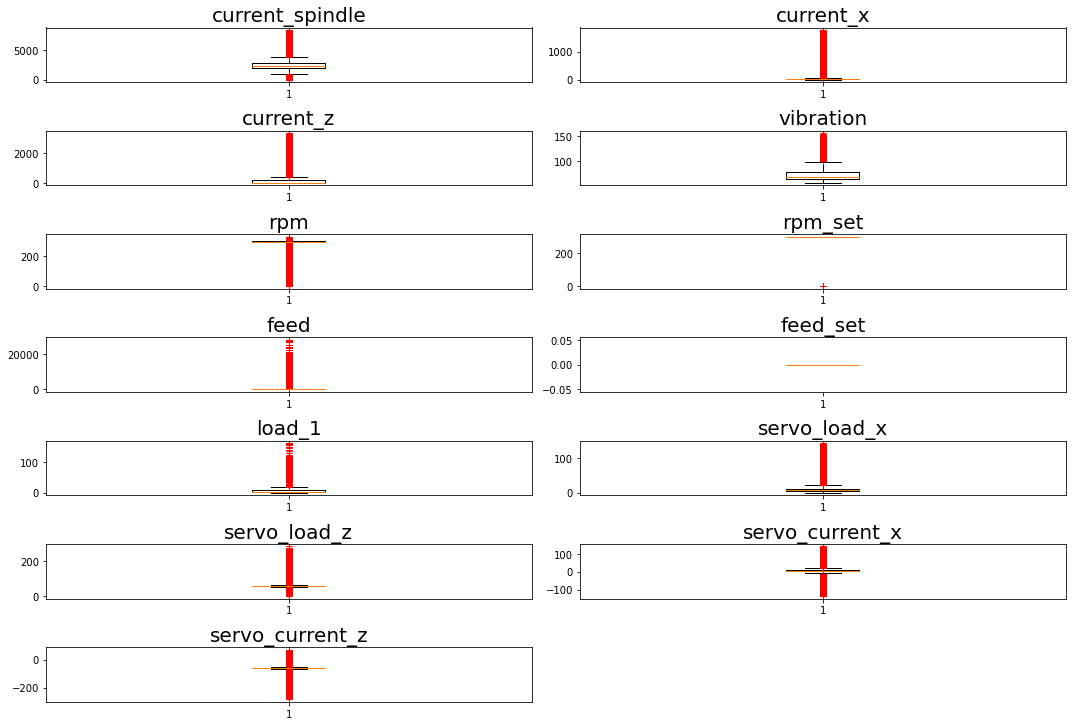

In [23]:
# boxplot

fig2 = plt.figure(figsize = (15,20))

for idx_box in range(0, len(temp_col)):
    globals()['ax_box{}'.format(idx_box)] = fig2.add_subplot(round(len(temp_col)+1/2),2,(idx_box+1))
    globals()['ax_box{}'.format(idx_box)].boxplot(temp_df_mod1[[temp_col[idx_box]]], sym = 'r+')
    globals()['ax_box{}'.format(idx_box)].set_title('{}'.format(temp_col[idx_box]), fontsize = 20)
fig2.tight_layout()

In [24]:
df_mod1.columns

Index(['datetime', 'shot_no', 'tool_number', 'current_spindle', 'current_x',
       'current_z', 'vibration', 'rpm', 'rpm_set', 'feed', 'feed_set',
       'load_1', 'servo_load_x', 'servo_load_z', 'servo_current_x',
       'servo_current_z', 'tool_state', 'tool', 'real_shot'],
      dtype='object')

<AxesSubplot:>

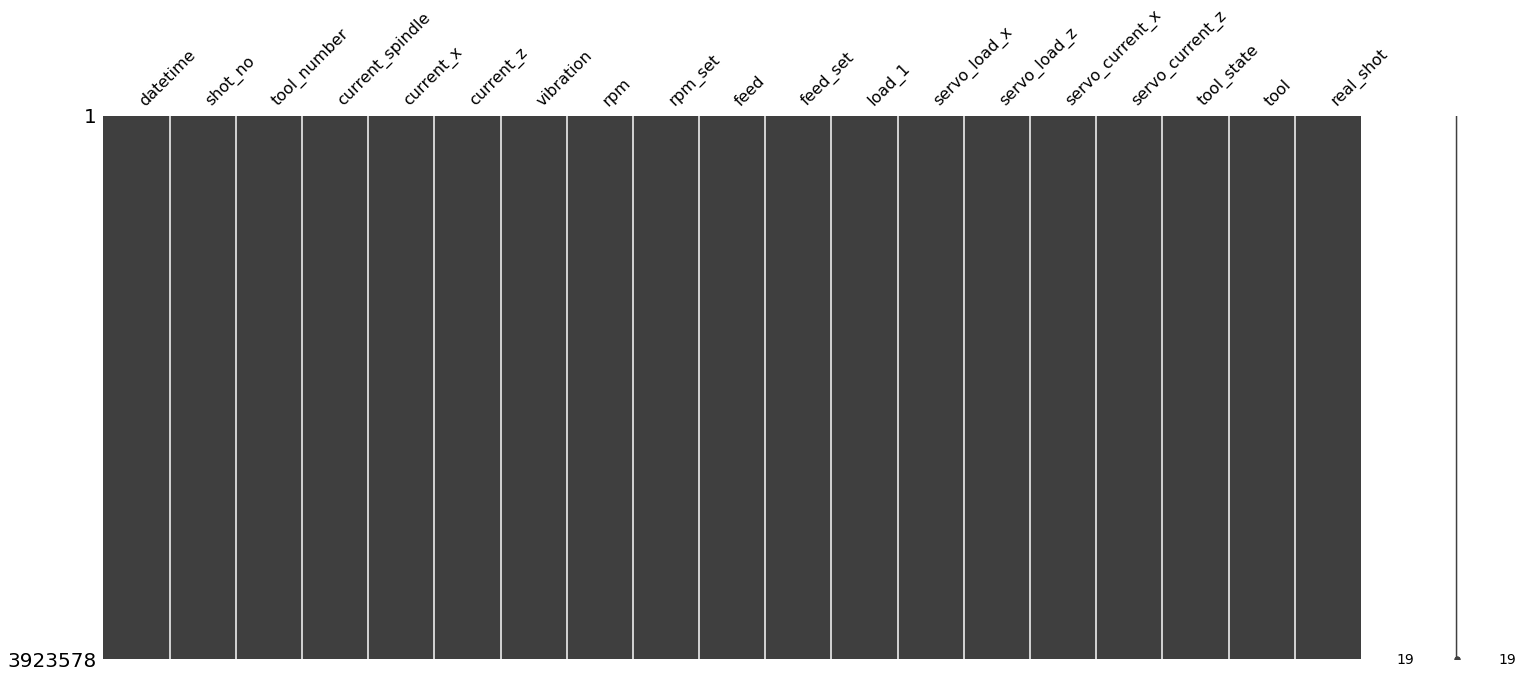

In [25]:
msno.matrix(df_mod1)

# Current_spindle에 대한 Visualization

In [17]:
stat = md.build_representative_data_for_tool_machining(df_mod1, 5, 'current_spindle', apply_robust_scaler=False, except_min_value=False, except_max_value=False)

In [18]:
stat

,mean,std,median,max,var,sem,sum,quantile(0.25),quantile(0.75),skew
real_shot,,,,,,,,,,
6,2499.265418,613.770380,2257.0,7737,376714.079887,13.118466,5470892,2021.0,2841.0,1.827344
7,2485.902283,600.323884,2254.0,7687,360388.766144,12.828136,5444126,2019.0,2821.0,1.679440
8,2500.598447,618.173952,2258.0,7601,382139.034751,13.212586,5473810,2019.0,2892.0,1.719930
9,2432.359799,543.915646,2234.0,6857,295844.229604,11.118858,5820637,2019.0,2601.0,1.811245
10,2460.962083,574.967925,2274.0,6382,330588.115106,12.289119,5387046,2019.0,2588.0,1.721648
...,...,...,...,...,...,...,...,...,...,...
1674,2478.696451,586.243184,2268.0,7330,343681.071144,11.979124,5936478,2021.5,2738.0,1.641722
1675,2487.103132,585.983764,2264.0,6639,343376.972233,11.973823,5956612,2023.0,2794.5,1.423531
1676,2488.373539,594.113837,2270.0,7751,352971.251224,12.137417,5962143,2022.0,2735.0,1.807388


mean


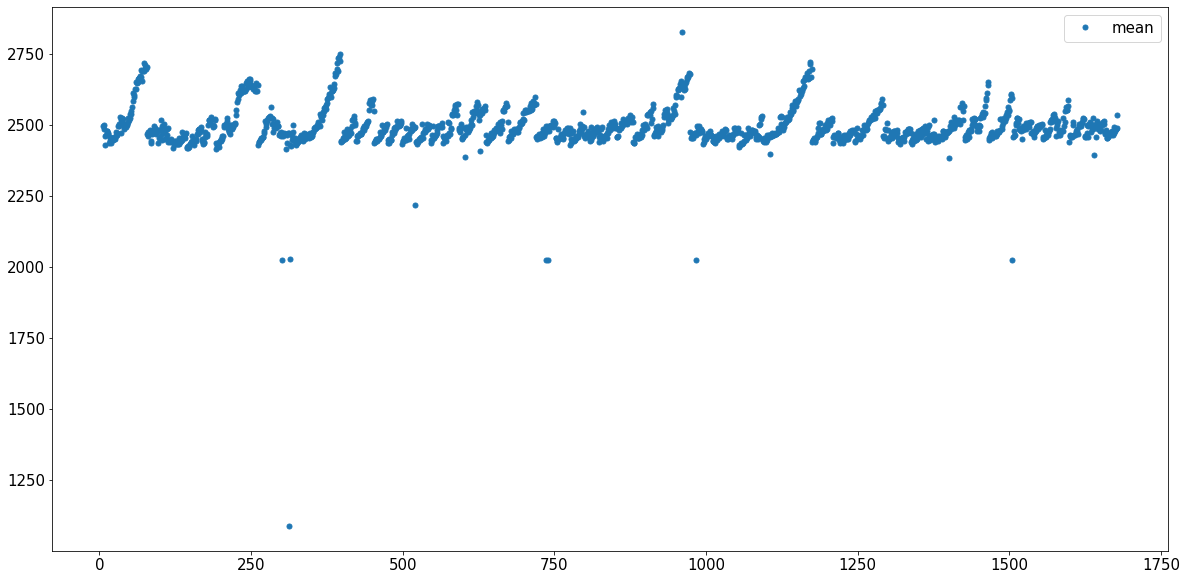

In [19]:
md.show_plot(stat, ['mean'])

# Data scaling

In [20]:
df_mod1.columns

Index(['datetime', 'shot_no', 'tool_number', 'current_spindle', 'current_x',
       'current_z', 'vibration', 'rpm', 'rpm_set', 'feed', 'feed_set',
       'load_1', 'servo_load_x', 'servo_load_z', 'servo_current_x',
       'servo_current_z', 'tool_state', 'tool', 'real_shot'],
      dtype='object')

In [21]:
df_mod1

,datetime,shot_no,tool_number,current_spindle,current_x,current_z,vibration,rpm,rpm_set,feed,feed_set,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state,tool,real_shot
250298,2022-07-13 15:09:30.476106,5831.0,707.0,2,0.0,2.0,194,0.0,0.0,0.0,0.0,0.0,4.0,70.0,4.0,-70.0,7.0,7.0,-1
250299,2022-07-13 15:09:30.485725,5831.0,707.0,0,0.0,2.0,194,0.0,0.0,0.0,0.0,0.0,4.0,70.0,4.0,-70.0,7.0,7.0,-1
250300,2022-07-13 15:09:30.945308,5831.0,707.0,0,0.0,2.0,195,0.0,0.0,0.0,0.0,0.0,4.0,70.0,4.0,-70.0,7.0,7.0,-1
250301,2022-07-13 15:09:31.455520,5831.0,707.0,2,0.0,2.0,196,0.0,0.0,0.0,0.0,0.0,4.0,70.0,4.0,-70.0,7.0,7.0,-1
250302,2022-07-13 15:09:31.463438,5831.0,707.0,0,0.0,2.0,196,0.0,0.0,0.0,0.0,0.0,4.0,70.0,4.0,-70.0,7.0,7.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40035537,2022-10-17 23:59:59.108860,7605.0,101.0,2019,28.0,2.0,59,300.0,300.0,82.0,0.0,1.0,7.0,58.0,-7.0,-58.0,1.0,1.0,-1
40035538,2022-10-17 23:59:59.297143,7605.0,101.0,2019,25.0,2.0,59,300.0,300.0,82.0,0.0,1.0,7.0,58.0,-7.0,-58.0,1.0,1.0,-1
40035539,2022-10-17 23:59:59.476278,7605.0,101.0,2019,25.0,2.0,59,299.0,300.0,82.0,0.0,0.0,7.0,58.0,-7.0,-58.0,1.0,1.0,-1
40035540,2022-10-17 23:59:59.724450,7605.0,101.0,2019,28.0,2.0,60,299.0,300.0,82.0,0.0,1.0,7.0,59.0,-7.0,-59.0,1.0,1.0,-1


In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

In [23]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
parameter = df_mod1[['current_spindle', 'current_x','current_z', 'vibration', 'rpm', 'rpm_set', 'feed', 'feed_set','load_1', 'servo_load_x', 'servo_load_z', 'servo_current_x','servo_current_z']]
shot_no = df_mod1['real_shot']
sts_data = pd.DataFrame(standard_scaler.fit_transform(parameter), columns = parameter.columns)
sts_data_temp = sts_data.copy()
# sts_data = pd.concat([shot_no, sts_data], axis = 1)
mms_data = pd.DataFrame(minmax_scaler.fit_transform(parameter), columns = parameter.columns)
mms_data_temp = mms_data.copy()
# mms_data = pd.concat([shot_no, mms_data], axis = 1)
rbs_data = pd.DataFrame(robust_scaler.fit_transform(parameter), columns = parameter.columns)
rbs_data_temp = rbs_data.copy()
# rbs_data = pd.concat([shot_no, rbs_data], axis = 1)

In [24]:
# #  Standard scaler
# plt.figure(figsize = (20,12))
# plt.plot(sts_data['current_spindle'])
# plt.legend()
# # plt.xticks(np.arange(0,258, 10), fontsize = 15, rotation = 90)
# # plt.xlabel('Shot_no', fontsize = 20)
# # plt.yticks(np.arange(0, 3000, 200), fontsize = 15)
# # plt.ylabel('current_spindle', fontsize = 20)

In [25]:
# # Minmax scaler
# plt.figure(figsize = (20,12))
# plt.plot(mms_data['current_spindle'])
# plt.legend()
# # plt.xticks(np.arange(0,258, 10), fontsize = 15, rotation = 90)
# # plt.xlabel('Shot_no', fontsize = 20)
# # plt.yticks(np.arange(0, 3000, 200), fontsize = 15)
# # plt.ylabel('current_spindle', fontsize = 20)

In [26]:
# # Robust scaler
# plt.figure(figsize = (20,12))
# plt.plot(rbs_data['current_spindle'])
# plt.legend()
# # plt.xticks(np.arange(0,258, 10), fontsize = 15, rotation = 90)
# # plt.xlabel('Shot_no', fontsize = 20)
# # plt.yticks(np.arange(0, 3000, 200), fontsize = 15)
# # plt.ylabel('current_spindle', fontsize = 20)

# 0. 기계학습 기반의 이상 탐지 기법
 - Chandola, V., Banerjee, A., & Kumar, V. (2009). Anomaly detection: A survey. ACM computing surveys (CSUR), 41(3), 15 참조
 - 기계학습(Machine Learning) 기반 이상 탐지(Anomaly Detection) 기법 연구 : 보건사회 분야를 중심으로, 오미애, 박아연, 김용대, 진재현, 2018 참조
 - Deep learning 이상탐지 기법은 추가적 조사 필요
 1. 분류 기반 이상 탐지 기법
  (1) 결정 규칙(Decision rule) 기반
  (2) SVM 기반
  (3) 신경망 기반
  (4) 베이지안 네트워크 기반
 2. NN(Nearest neighbor) 기반 이상 탐지 기법
  (1) k번째로 가까운 개체와의 거리 이용(거리 기반)
  (2) 상대 밀도 기반(밀도 기반)
 3. 군집화(Clustering) 기반 이상 탐지 기법
  (1) 근본 가정에 따른 군집화 기반 이상 탐지 기법
 4. 통계적 기법
  (1) 모수적 기법 - 1) 정규모형, 2) 회귀모형, 3) 혼합 모수적 모형
  (2) 비모수적 기법 - 1) 히스토그램, 2) 커널 함수
 5. 정보 이론 기법
 6. 스펙트럴 이상 탐지 기법
 7. 맥락적 이상 탐지
  (1) 점 이상 문제로 축소
  (2) 자료 구조 활용
 8. 딥러닝 이상 탐지 기법
  (1) Deep Embedded Clustering(DEC)
  (2) Deep Autoencoding Gaussian Mixture Model(DAGMM)

# 1. 분류 기반 이상 탐지 기법

In [27]:
# 이상탐지 결과값을 도출하기 위하여 새 변수 생성
# df_mod2 = df_mod1.copy()


# (1) 결정 규칙 기반 - Isolation forest

1. Isolation Forest는 기본적으로 데이터셋을 의사결정나무 형태로 표현해 정상값을 분리하기 위해서는 의사결정나무를 깊숙하게 타고 내려가야 하고, 반대로 이상값은 인사결정나무 상단부에서 분리할 수 있음

# 가. Current spindle

In [28]:
len(df_mod1)

39781428

In [29]:
# 학습 모델
# IF = IsolationForest(random_state = 42, contamination = 0.1, n_estimators = 100, max_samples = 30)
# IF.fit(df_mod2[['current_spindle']])
# score = IF.decision_function(df_mod2[['current_spindle']])
# df_mod2['IF_Outliers'] = pd.Series(IF.predict(df_mod2[['current_spindle']])).apply(lambda x: 1 if x == -1 else 0)
# df_mod2['IF_score'] = score
# # df_mod2 = pd.concat([shot_no, df_mod2], axis = 1)
# outlier = df_mod2.query('IF_Outliers == 1')
# outlier

# train, test set 설정
train_stat = stat.copy().iloc[1201:1598, :]
test_stat = stat.copy()

md.check_and_mark_outlier_by_IsolationForest_org(train_stat, test_stat, 'mean', training_or_test= True)
md.check_and_mark_outlier_by_IsolationForest_org(train_stat, test_stat, 'mean', training_or_test= False)

mean


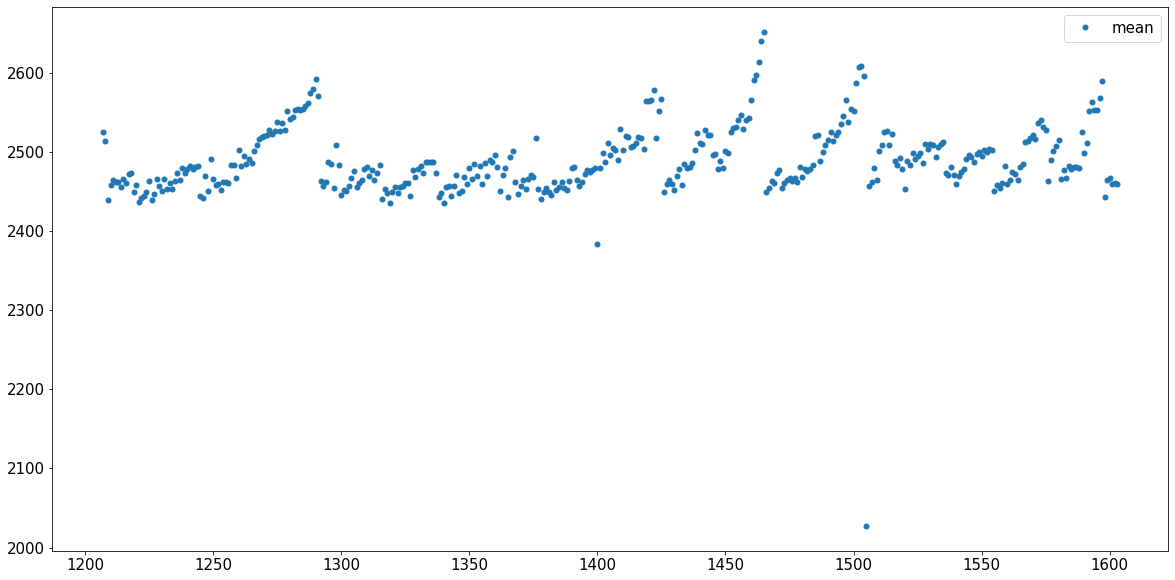

In [30]:
md.show_plot(train_stat, ['mean'])

In [31]:
test_stat

,mean,std,median,max,var,sem,sum,quantile(0.25),quantile(0.75),skew,IF_Outliers,IF_score
real_shot,,,,,,,,,,,,
6,2499.265418,613.770380,2257.0,7737,376714.079887,13.118466,5470892,2021.0,2841.0,1.827344,0,-0.471442
7,2485.902283,600.323884,2254.0,7687,360388.766144,12.828136,5444126,2019.0,2821.0,1.679440,0,-0.447544
8,2500.598447,618.173952,2258.0,7601,382139.034751,13.212586,5473810,2019.0,2892.0,1.719930,0,-0.470067
9,2432.359799,543.915646,2234.0,6857,295844.229604,11.118858,5820637,2019.0,2601.0,1.811245,0,-0.645364
10,2460.962083,574.967925,2274.0,6382,330588.115106,12.289119,5387046,2019.0,2588.0,1.721648,0,-0.437848
...,...,...,...,...,...,...,...,...,...,...,...,...
1674,2478.696451,586.243184,2268.0,7330,343681.071144,11.979124,5936478,2021.5,2738.0,1.641722,0,-0.434850
1675,2487.103132,585.983764,2264.0,6639,343376.972233,11.973823,5956612,2023.0,2794.5,1.423531,0,-0.451140
1676,2488.373539,594.113837,2270.0,7751,352971.251224,12.137417,5962143,2022.0,2735.0,1.807388,0,-0.452437


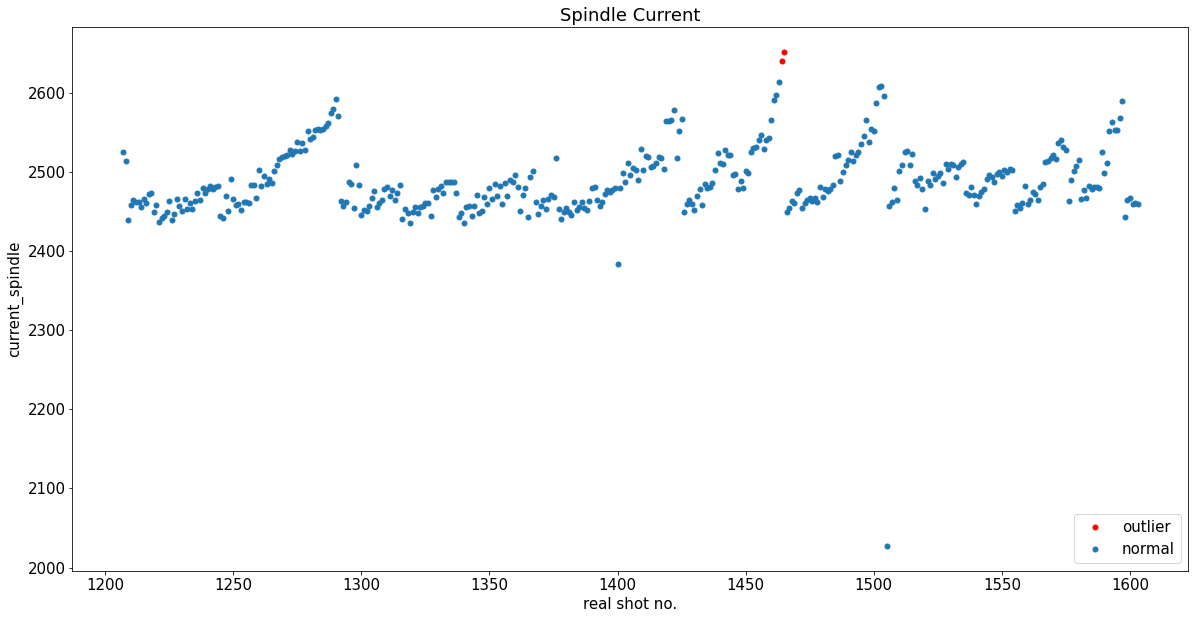

In [32]:
md.show_plot_comparing_data_by_condition(train_stat, 'mean', 'IF_Outliers', [1], data_names = ('outlier', 'normal'),
                                      title = 'Spindle Current', x_axis_title='real shot no.', y_axis_title='current_spindle')

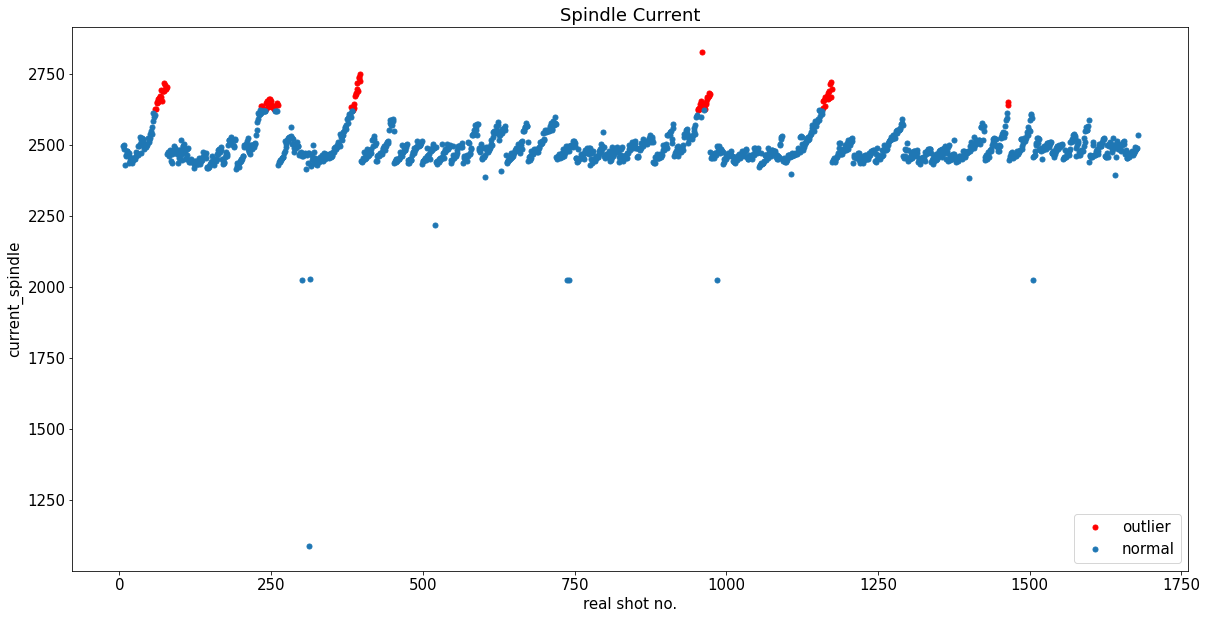

In [33]:
# Test-set 적용
md.show_plot_comparing_data_by_condition(test_stat, 'mean', 'IF_Outliers', [1], data_names = ('outlier', 'normal'),
                                      title = 'Spindle Current', x_axis_title='real shot no.', y_axis_title='current_spindle')

2625.372029250457

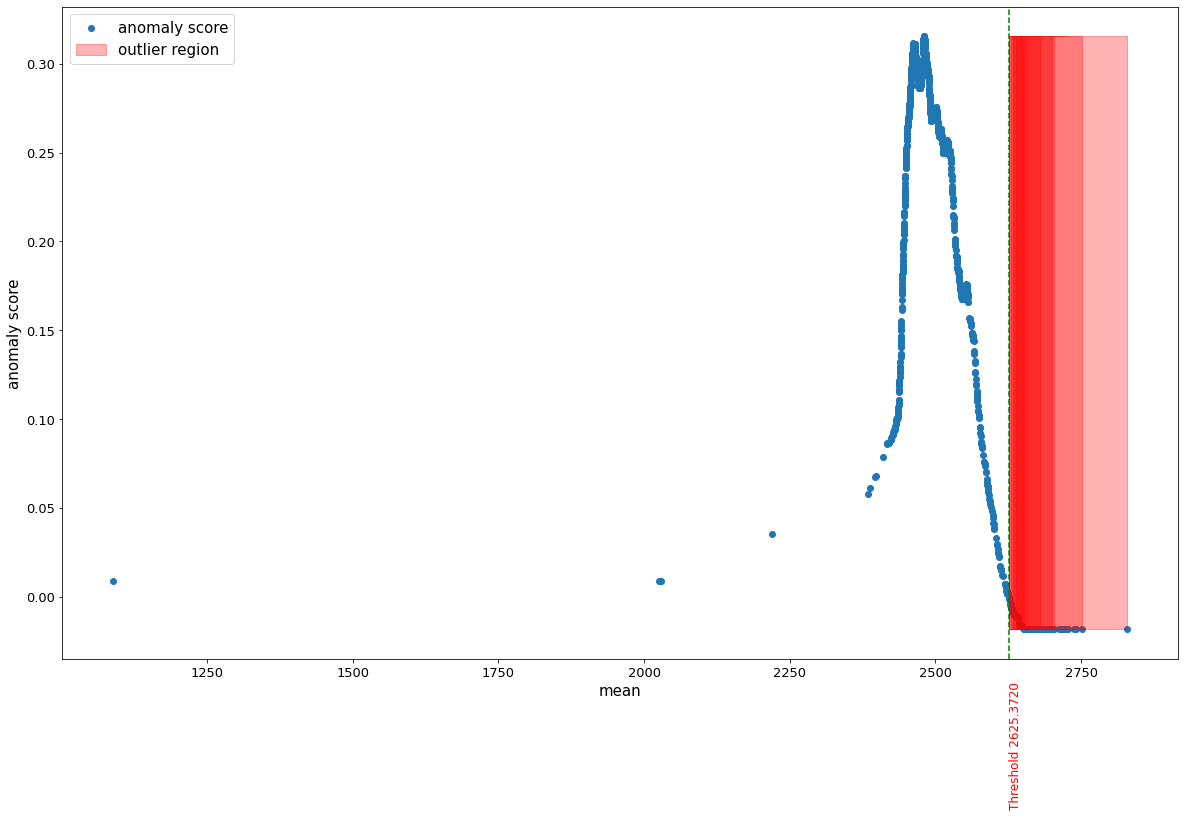

In [34]:
md.threshould_deduction(test_stat, 'mean', True)

In [35]:
test_stat

,mean,std,median,max,var,sem,sum,quantile(0.25),quantile(0.75),skew,IF_Outliers,IF_score
real_shot,,,,,,,,,,,,
6,2499.265418,613.770380,2257.0,7737,376714.079887,13.118466,5470892,2021.0,2841.0,1.827344,0,-0.471442
7,2485.902283,600.323884,2254.0,7687,360388.766144,12.828136,5444126,2019.0,2821.0,1.679440,0,-0.447544
8,2500.598447,618.173952,2258.0,7601,382139.034751,13.212586,5473810,2019.0,2892.0,1.719930,0,-0.470067
9,2432.359799,543.915646,2234.0,6857,295844.229604,11.118858,5820637,2019.0,2601.0,1.811245,0,-0.645364
10,2460.962083,574.967925,2274.0,6382,330588.115106,12.289119,5387046,2019.0,2588.0,1.721648,0,-0.437848
...,...,...,...,...,...,...,...,...,...,...,...,...
1674,2478.696451,586.243184,2268.0,7330,343681.071144,11.979124,5936478,2021.5,2738.0,1.641722,0,-0.434850
1675,2487.103132,585.983764,2264.0,6639,343376.972233,11.973823,5956612,2023.0,2794.5,1.423531,0,-0.451140
1676,2488.373539,594.113837,2270.0,7751,352971.251224,12.137417,5962143,2022.0,2735.0,1.807388,0,-0.452437


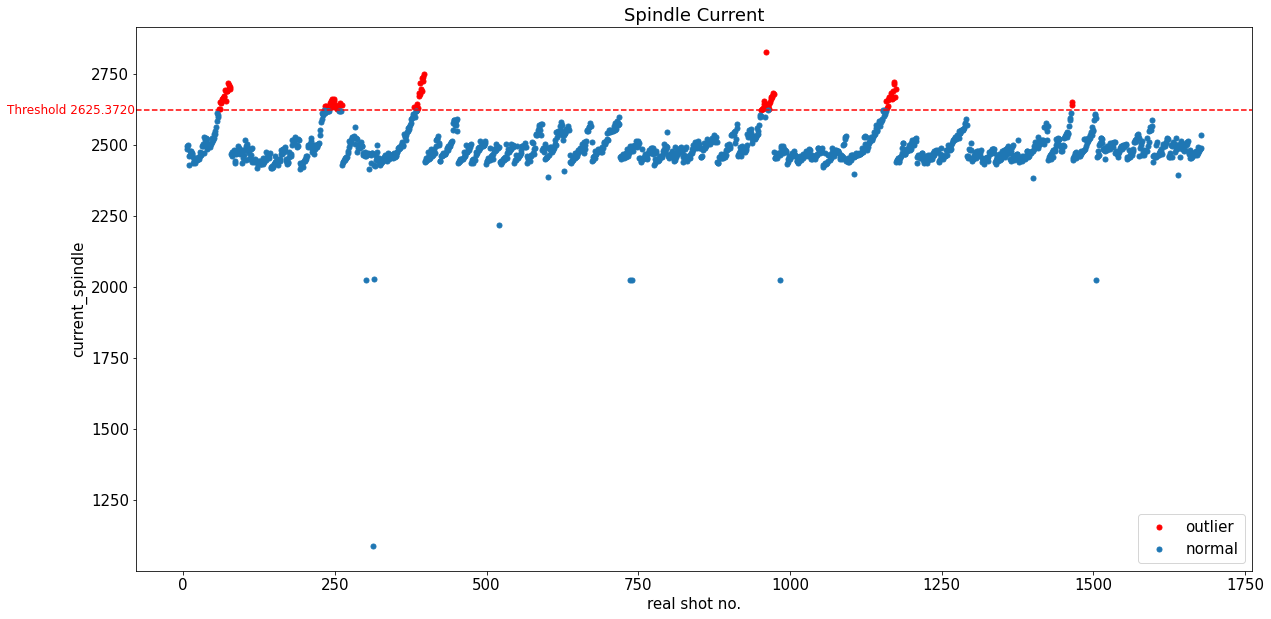

In [36]:
md.show_plot_with_threshould(test_stat, 'mean', 'IF_Outliers', [1], data_names = ('outlier', 'normal'),
                                      title = 'Spindle Current', x_axis_title='real shot no.', y_axis_title='current_spindle')

# 나. Scaling data 기반의 전체 Feature 모델 수립

In [37]:
df_mod1

,datetime,shot_no,tool_number,current_spindle,current_x,current_z,vibration,rpm,rpm_set,feed,feed_set,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tool_state,tool,real_shot
250298,2022-07-13 15:09:30.476106,5831.0,707.0,2,0.0,2.0,194,0.0,0.0,0.0,0.0,0.0,4.0,70.0,4.0,-70.0,7.0,7.0,-1
250299,2022-07-13 15:09:30.485725,5831.0,707.0,0,0.0,2.0,194,0.0,0.0,0.0,0.0,0.0,4.0,70.0,4.0,-70.0,7.0,7.0,-1
250300,2022-07-13 15:09:30.945308,5831.0,707.0,0,0.0,2.0,195,0.0,0.0,0.0,0.0,0.0,4.0,70.0,4.0,-70.0,7.0,7.0,-1
250301,2022-07-13 15:09:31.455520,5831.0,707.0,2,0.0,2.0,196,0.0,0.0,0.0,0.0,0.0,4.0,70.0,4.0,-70.0,7.0,7.0,-1
250302,2022-07-13 15:09:31.463438,5831.0,707.0,0,0.0,2.0,196,0.0,0.0,0.0,0.0,0.0,4.0,70.0,4.0,-70.0,7.0,7.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40035537,2022-10-17 23:59:59.108860,7605.0,101.0,2019,28.0,2.0,59,300.0,300.0,82.0,0.0,1.0,7.0,58.0,-7.0,-58.0,1.0,1.0,-1
40035538,2022-10-17 23:59:59.297143,7605.0,101.0,2019,25.0,2.0,59,300.0,300.0,82.0,0.0,1.0,7.0,58.0,-7.0,-58.0,1.0,1.0,-1
40035539,2022-10-17 23:59:59.476278,7605.0,101.0,2019,25.0,2.0,59,299.0,300.0,82.0,0.0,0.0,7.0,58.0,-7.0,-58.0,1.0,1.0,-1
40035540,2022-10-17 23:59:59.724450,7605.0,101.0,2019,28.0,2.0,60,299.0,300.0,82.0,0.0,1.0,7.0,59.0,-7.0,-59.0,1.0,1.0,-1


In [38]:
# sts_data, sts_data, rbs_data (scaler 변경)
multi_shot = df_mod1[['shot_no']]
result = pd.DataFrame(sts_data, columns = parameter.columns)
result_corr = result.corr()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0, 0.5, 'current_spindle'),
  Text(0, 1.5, 'current_x'),
  Text(0, 2.5, 'current_z'),
  Text(0, 3.5, 'vibration'),
  Text(0, 4.5, 'rpm'),
  Text(0, 5.5, 'rpm_set'),
  Text(0, 6.5, 'feed'),
  Text(0, 7.5, 'feed_set'),
  Text(0, 8.5, 'load_1'),
  Text(0, 9.5, 'servo_load_x'),
  Text(0, 10.5, 'servo_load_z'),
  Text(0, 11.5, 'servo_current_x'),
  Text(0, 12.5, 'servo_current_z')])

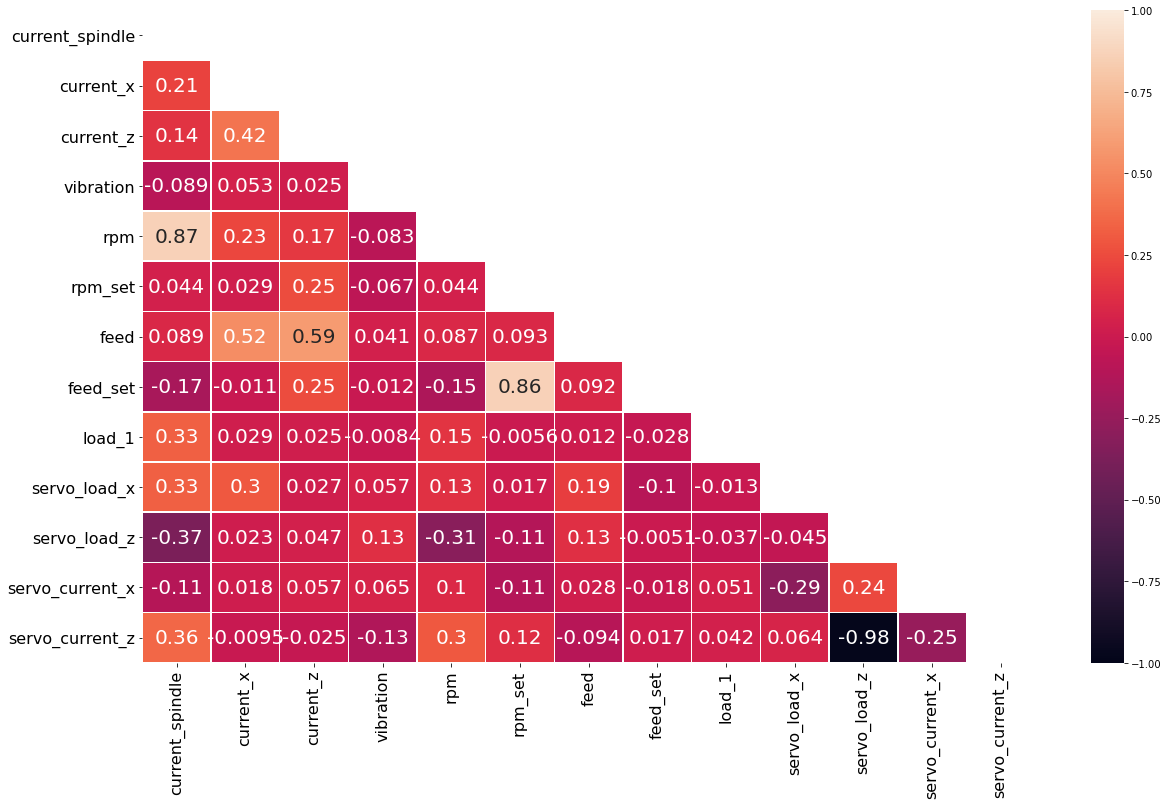

In [39]:
import seaborn as sns
plt.figure(figsize = (20, 12))

mask = np.triu(np.ones_like(result_corr, dtype=np.bool))
sns.heatmap(result_corr, mask = mask, vmin = -1, vmax = 1, annot = True, linewidths = .5, annot_kws = {'size':20})
plt.xticks(fontsize = 16, rotation = 90)
plt.yticks(fontsize = 16)

In [40]:
sts_data

,current_spindle,current_x,current_z,vibration,rpm,rpm_set,feed,feed_set,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z
0,-1.299916,-0.270068,-0.274546,9.969901,-1.129514,-0.785776,-0.163112,-0.129767,-0.219656,-0.685771,0.789964,0.555967,-0.772538
1,-1.301823,-0.270068,-0.274546,9.969901,-1.129514,-0.785776,-0.163112,-0.129767,-0.219656,-0.685771,0.789964,0.555967,-0.772538
2,-1.301823,-0.270068,-0.274546,10.052001,-1.129514,-0.785776,-0.163112,-0.129767,-0.219656,-0.685771,0.789964,0.555967,-0.772538
3,-1.299916,-0.270068,-0.274546,10.134100,-1.129514,-0.785776,-0.163112,-0.129767,-0.219656,-0.685771,0.789964,0.555967,-0.772538
4,-1.301823,-0.270068,-0.274546,10.134100,-1.129514,-0.785776,-0.163112,-0.129767,-0.219656,-0.685771,0.789964,0.555967,-0.772538
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781423,0.623155,0.190790,-0.274546,-1.113523,0.954565,0.037455,-0.095616,-0.129767,-0.083218,-0.094888,-0.427742,-0.668010,0.411524
39781424,0.623155,0.141412,-0.274546,-1.113523,0.954565,0.037455,-0.095616,-0.129767,-0.083218,-0.094888,-0.427742,-0.668010,0.411524
39781425,0.623155,0.141412,-0.274546,-1.113523,0.947618,0.037455,-0.095616,-0.129767,-0.219656,-0.094888,-0.427742,-0.668010,0.411524
39781426,0.623155,0.190790,-0.274546,-1.031424,0.947618,0.037455,-0.095616,-0.129767,-0.083218,-0.094888,-0.326266,-0.668010,0.312853


In [42]:
# 학습 모델 (scaler 변경)
IF_multi = IsolationForest(random_state = 42, contamination = 0.004 , n_estimators = 500, max_samples = 90, n_jobs = -1, bootstrap = True)
IF_multi.fit(sts_data)
score = IF_multi.decision_function(sts_data)
result['IF_Outliers'] = pd.Series(IF_multi.predict(sts_data)).apply(lambda x: 1 if x == -1 else 0)
result['IF_score'] = score
result['shot_no'] = multi_shot
multi_outlier = result.query('IF_Outliers == 1')
multi_outlier

MemoryError: Unable to allocate 3.85 GiB for an array with shape (13, 39781428) and data type float64

- 일반적으로 Isolation forest의 이상지수 score는 0 ~ 1사이 값으로 표현됨
- Tree는 50 ~ 100개 정도의 모델을 사용하면 Score가 안정화된다는 논문이 존재함
- Score는 s(x,n) = 2^(E(h(x))/c(n))으로 계산함
  여기서, h(x) : x까지의 경로 길이, c(n) : 평균 경로 길이, n : 외부노드의 수
  비정상 판단 유무(Score를 이용)
  Score가 1에 가까우면 비정상, 0.5 이하이면 정상으로 판단, 모든 score가 0.5에 가까우면 전체 데이터에서 이상치를 발견하지 못한것으로 판단 가능

In [ ]:
result[result['IF_score'] < 0]

In [ ]:
print("Number of outliers detected: {}".format(len(multi_outlier)))
print("Number of normal samples detected: {}".format(len(result)))

In [ ]:
multi_outlier['shot_no'].values

In [ ]:
multi_outlier['shot_no'].values[0]

In [ ]:
# Train 데이터 시각화
fig = plt.figure(figsize = (20,18))
temp_graph = list(parameter.columns)

for fig_idx in range(0, len(temp_graph)):
    locals()['ax_()'.format(fig_idx)] = fig.add_subplot(len(temp_graph), 1, fig_idx+1)
    locals()['ax_()'.format(fig_idx)].plot(result['shot_no'], result[temp_graph[fig_idx]], color = 'blue')
    locals()['ax_()'.format(fig_idx)].scatter(multi_outlier['shot_no'], multi_outlier[temp_graph[fig_idx]], color = 'red', s= 100, marker = 'X')
    for axv_idx in range(len(multi_outlier['shot_no'].values)):
        locals()['ax_()'.format(axv_idx)].axvline(x  = multi_outlier['shot_no'].values[axv_idx])
    locals()['ax_()'.format(fig_idx)].set_title('{}_isolation anomaly'.format(temp_graph[fig_idx]), fontsize = 20)
    locals()['ax_()'.format(fig_idx)].set_xticks(np.arange(0, 260, 10))
    locals()['ax_()'.format(fig_idx)].set_xticklabels(np.arange(0, 260, 10), fontsize = 15)
    locals()['ax_()'.format(fig_idx)].set_yticks(np.arange(-5, 5, 3))
    locals()['ax_()'.format(fig_idx)].set_yticklabels(np.arange(-5, 5, 3), fontsize = 15)
fig.tight_layout()

In [ ]:
test_multi_data = pd.read_csv('Tool5_small_data_processing.csv')
test_multi_data

In [ ]:
# 테스트셋 적용(scaler 변경(모델) standard, standard, robust)
test_multi_data = pd.read_csv('Tool5_small_data_processing.csv')
test_multi_data = test_multi_data[['shot_no', 'current_spindle', 'current_x', 'current_z', 'rpm', 'load_1', 'servo_load_x', 'servo_load_z', 'servo_current_x', 'servo_current_z']]
test_multi_data = test_multi_data.groupby('shot_no').mean()
test_multi_data = test_multi_data.reset_index()
test_multi_shot_no = test_multi_data['shot_no']
test_multi_data_scaling = pd.DataFrame(standard_scaler.fit_transform(test_multi_data.drop('shot_no', axis = 1)), columns = test_multi_data.columns[1:])
scaling_temp = test_multi_data_scaling.copy()
test_multi_data_scaling['IF_score'] = pd.Series(IF_multi.decision_function(scaling_temp))
test_multi_data_scaling['IF_multi_Outliers'] = pd.Series(IF_multi.predict(scaling_temp)).apply(lambda x: 1 if x == -1 else 0)
test_multi_data_scaling['shot_no'] = test_multi_shot_no
test_multi_outlier = test_multi_data_scaling.query('IF_multi_Outliers == 1')
test_multi_outlier

In [ ]:
from sklearn.tree import export_graphviz

model_multi = IF_multi.estimators_[8]

export_graphviz(model_multi, out_file = 'tree.dot', feature_names = parameter.columns)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'Multivariate_iForest-tree.png', '-Gdpi=1000'])

from IPython.display import Image
Image(filename = 'Multivariate_iForest-tree.png')

In [ ]:
test_multi_outlier.info()

In [ ]:
# 테스트 셋 시각화
fig5 = plt.figure(figsize = (20,18))
temp_multi_graph = list(parameter.columns)

for fig5_idx in range(0, len(temp_multi_graph)):
    locals()['ax_()'.format(fig5_idx)] = fig5.add_subplot(len(temp_multi_graph), 1, fig5_idx+1)
    locals()['ax_()'.format(fig5_idx)].plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling[temp_multi_graph[fig5_idx]], color = 'blue')
    locals()['ax_()'.format(fig5_idx)].scatter(test_multi_outlier['shot_no'], test_multi_outlier[temp_multi_graph[fig5_idx]], color = 'red', s= 100, marker = 'X')
#     for axv_idx in range(len(test_multi_outlier['shot_no'].values)):
#         locals()['ax_()'.format(axv_idx)].axvline(x  = test_multi_outlier['shot_no'].values[axv_idx])
    locals()['ax_()'.format(fig5_idx)].set_title('{}_isolation anomaly'.format(temp_multi_graph[fig5_idx]), fontsize = 20)
    locals()['ax_()'.format(fig5_idx)].set_xticks(np.arange(min(test_multi_data_scaling['shot_no'])+5, max(test_multi_data_scaling['shot_no'])+5, 20))
    locals()['ax_()'.format(fig5_idx)].set_xticklabels(np.arange(min(test_multi_data_scaling['shot_no'])+5, max(test_multi_data_scaling['shot_no'])+5, 20), rotation = 90, fontsize = 15)
    # locals()['ax_()'.format(fig5_idx)].set_yticks(np.arange(-15, 15, 8))
    # locals()['ax_()'.format(fig5_idx)].set_yticklabels(np.arange(-15, 15, 8), fontsize = 15)
fig5.tight_layout()

In [ ]:
plt.figure(figsize = (20, 12))
plt.plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling['current_spindle'], color = 'blue')
plt.scatter(test_multi_outlier['shot_no'], test_multi_outlier['current_spindle'], color = 'red', s= 100, marker = 'X')
# for axv_idx in range(len(test_multi_outlier['shot_no'].values)):
#     plt.axvline(x  = test_multi_outlier['shot_no'].values[axv_idx])

In [ ]:
plt.figure(figsize = (20, 12))
plt.plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling['current_x'], color = 'blue')
plt.scatter(test_multi_outlier['shot_no'], test_multi_outlier['current_x'], color = 'red', s= 100, marker = 'X')
# for axv_idx in range(len(test_multi_outlier['shot_no'].values)):
#     plt.axvline(x  = test_multi_outlier['shot_no'].values[axv_idx])

In [ ]:
plt.figure(figsize = (20, 12))
plt.plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling['current_z'], color = 'blue')
plt.scatter(test_multi_outlier['shot_no'], test_multi_outlier['current_z'], color = 'red', s= 100, marker = 'X')
# for axv_idx in range(len(test_multi_outlier['shot_no'].values)):
#     plt.axvline(x  = test_multi_outlier['shot_no'].values[axv_idx])

In [ ]:
plt.figure(figsize = (20, 12))
plt.plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling['rpm'], color = 'blue')
plt.scatter(test_multi_outlier['shot_no'], test_multi_outlier['rpm'], color = 'red', s= 100, marker = 'X')
# for axv_idx in range(len(test_multi_outlier['shot_no'].values)):
#     plt.axvline(x  = test_multi_outlier['shot_no'].values[axv_idx])

In [ ]:
plt.figure(figsize = (20, 12))
plt.plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling['load_1'], color = 'blue')
plt.scatter(test_multi_outlier['shot_no'], test_multi_outlier['load_1'], color = 'red', s= 100, marker = 'X')
# for axv_idx in range(len(test_multi_outlier['shot_no'].values)):
#     plt.axvline(x  = test_multi_outlier['shot_no'].values[axv_idx])

In [ ]:
plt.figure(figsize = (20, 12))
plt.plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling['servo_load_x'], color = 'blue')
plt.scatter(test_multi_outlier['shot_no'], test_multi_outlier['servo_load_x'], color = 'red', s= 100, marker = 'X')
# for axv_idx in range(len(test_multi_outlier['shot_no'].values)):
#     plt.axvline(x  = test_multi_outlier['shot_no'].values[axv_idx])

In [ ]:
plt.figure(figsize = (20, 12))
plt.plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling['servo_load_z'], color = 'blue')
plt.scatter(test_multi_outlier['shot_no'], test_multi_outlier['servo_load_z'], color = 'red', s= 100, marker = 'X')
# for axv_idx in range(len(test_multi_outlier['shot_no'].values)):
#     plt.axvline(x  = test_multi_outlier['shot_no'].values[axv_idx])

In [ ]:
plt.figure(figsize = (20, 12))
plt.plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling['servo_current_x'], color = 'blue')
plt.scatter(test_multi_outlier['shot_no'], test_multi_outlier['servo_current_x'], color = 'red', s= 100, marker = 'X')
# for axv_idx in range(len(test_multi_outlier['shot_no'].values)):
#     plt.axvline(x  = test_multi_outlier['shot_no'].values[axv_idx])

In [ ]:
plt.figure(figsize = (20, 12))
plt.plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling['servo_current_z'], color = 'blue')
plt.scatter(test_multi_outlier['shot_no'], test_multi_outlier['servo_current_z'], color = 'red', s= 100, marker = 'X')
# for axv_idx in range(len(test_multi_outlier['shot_no'].values)):
#     plt.axvline(x  = test_multi_outlier['shot_no'].values[axv_idx])

# 다. PCA-Isolation forest

In [ ]:
sts_data

In [ ]:
from sklearn.decomposition import PCA
multi_shot = df_mod1[['shot_no']]
component = 2
pca = PCA(n_components = component)
result_scaler = [sts_data_temp, mms_data_temp, rbs_data_temp]
scaler_name = ['Standardization', 'Minmax', 'Robust']

for result_scaler_list, list_name in zip(result_scaler, scaler_name):
    globals()['{}_pca_parameter'.format(list_name)] = PCA(n_components=component, random_state = 42).fit(result_scaler_list) #PCA.fit() : 주성분 찾음 
    globals()['{}_PCA'.format(list_name)] = pd.DataFrame(globals()['{}_pca_parameter'.format(list_name)].transform(result_scaler_list), columns = ['PC'+str(i) for i in range(1, component+1)]) #PCA.transform():새로운 주성분으로 데이터 변환, globals을 통한변수 생성
    globals()['{}_PCA_percent_variance'.format(list_name)] = np.round(globals()['{}_pca_parameter'.format(list_name)].explained_variance_ratio_ * 100, decimals = 2)
    print('* 순서대로 {}'.format(['PC'+str(i) for i in range(1, component+1)]))
    print('{}의 PCA 설명력은 {}입니다.'.format(list_name, globals()['{}_PCA_percent_variance'.format(list_name)]))
    print('{}개 주성분의 누적 설명력은 {}입니다.'.format(component,sum(globals()['{}_PCA_percent_variance'.format(list_name)])))
    print('-'*100, end = '\n')

In [ ]:
#PCA 모든 설명력 그래프로 표기
chart_column = ['PC'+str(d) for d in range(1, component +1)]
bar_chart = plt.figure(figsize=(10,10))
scale_num = list(range(1,5))

for name, scale_num_idx in zip(scaler_name, scale_num): 
    globals()['ax{}'.format(scale_num_idx)] = bar_chart.add_subplot(2,2,scale_num_idx)
    globals()['ax{}'.format(scale_num_idx)].bar(chart_column, height = globals()['{}_PCA_percent_variance'.format(name)])
    globals()['ax{}'.format(scale_num_idx)].set_ylabel('Percent of Variance Explained', fontsize = 10)
    globals()['ax{}'.format(scale_num_idx)].set_xlabel('Principal Component{}'.format(scale_num_idx), fontsize = 10)
    globals()['ax{}'.format(scale_num_idx)].set_title('{} PCA Scree Plot'.format(name), fontsize = 12)
    for j, v in enumerate(chart_column):  # 차트에 수치 표시
            plt.text(v, globals()['{}_PCA_percent_variance'.format(name)][j], globals()['{}_PCA_percent_variance'.format(name)][j], fontsize = 9, horizontalalignment = 'center', verticalalignment = 'bottom')
plt.tight_layout()
plt.show()

In [ ]:
# Standardization_PCA, Minmax_PCA, Robust_PCA
Standardization_PCA

In [ ]:
# 학습 모델(scaler 변경(Standardization_PCA, Minmax_PCA, Robust_PCA))
IF_PCA = IsolationForest(random_state = 42, contamination = 0.1, n_estimators = 100, max_samples = 50, n_jobs = -1, max_features=component)
Standardization_PCA_temp = Standardization_PCA.copy()
print(Standardization_PCA_temp)
IF_PCA.fit(Standardization_PCA_temp)
score = IF_PCA.decision_function(Standardization_PCA_temp)
Standardization_PCA['IF_PCA_Outliers'] = pd.Series(IF_PCA.predict(Standardization_PCA_temp)).apply(lambda x: 1 if x == -1 else 0)
Standardization_PCA['IF_PCA_score'] = score
Standardization_PCA['shot_no'] = multi_shot
PCA_outlier = Standardization_PCA.query('IF_PCA_Outliers == 1')
PCA_outlier

In [ ]:
print("Number of outliers detected: {}".format(len(PCA_outlier)))
print("Number of normal samples detected: {}".format(len(Minmax_PCA)))

In [ ]:
# Standardization_PCA, Minmax_PCA, Robust_PCA
Standardization_PCA

In [ ]:
# Train 데이터 시각화(scaler 변경(Standardization_PCA, Minmax_PCA, Robust_PCA))
fig = plt.figure(figsize = (20,18))
temp_PCA = list(Standardization_PCA.columns[:component])

for PCA_idx in range(0, len(temp_PCA)):
    locals()['ax_()'.format(PCA_idx)] = fig.add_subplot(len(temp_PCA), 1, PCA_idx+1)
    locals()['ax_()'.format(PCA_idx)].plot(Standardization_PCA['shot_no'], Standardization_PCA[temp_PCA[PCA_idx]], color = 'blue')
    locals()['ax_()'.format(PCA_idx)].scatter(PCA_outlier['shot_no'], PCA_outlier[temp_PCA[PCA_idx]], color = 'red', s= 100, marker = 'X')
    for axv_idx in range(len(PCA_outlier['shot_no'].values)):
        locals()['ax_()'.format(axv_idx)].axvline(x  = PCA_outlier['shot_no'].values[axv_idx])
    locals()['ax_()'.format(PCA_idx)].set_title('{}_isolation anomaly'.format(temp_PCA[PCA_idx]), fontsize = 20)
    locals()['ax_()'.format(PCA_idx)].set_xticks(np.arange(0, 260, 10))
    locals()['ax_()'.format(PCA_idx)].set_xticklabels(np.arange(0, 260, 10), fontsize = 15)
    locals()['ax_()'.format(PCA_idx)].set_yticks(np.arange(-5, 5, 3))
    locals()['ax_()'.format(PCA_idx)].set_yticklabels(np.arange(-5, 5, 3), fontsize = 15)
fig.tight_layout()

In [ ]:
test_multi_data_scaling

In [ ]:
test_multi_data_scaling.iloc[:, :-3]

In [ ]:
# 테스트셋 적용(앞의 scaling 값 적용)
test_set_PCA = test_multi_data_scaling.iloc[:, :-3].copy()
test_set_PCA = pd.DataFrame(pca.fit_transform(test_set_PCA), columns = ['PC'+str(i) for i in range(1, component+1)])
print(test_set_PCA)
test_set_PCA_temp = test_set_PCA.copy()
test_set_PCA['IF_PCA_score'] = pd.Series(IF_PCA.decision_function(test_set_PCA_temp))
test_set_PCA['IF_PCA_Outliers'] = pd.Series(IF_PCA.predict(test_set_PCA_temp)).apply(lambda x: 1 if x == -1 else 0)
test_set_PCA['shot_no'] = test_multi_shot_no
test_PCA_outlier = test_set_PCA.query('IF_PCA_Outliers == 1')
test_PCA_outlier

In [ ]:
# Test-set normal 데이터와 이상치 데이터
print("---PCA test set 적용 결과---")
print("Number of outliers detected: {}".format(len(test_PCA_outlier)))
print("Number of normal samples detected: {}".format(len(test_set_PCA)))

In [ ]:
# 테스트 셋 시각화
fig_PCA_test = plt.figure(figsize = (20,18))
temp_test_PCA_graph = list(test_set_PCA_temp.columns)

for fig_PCA_test_idx in range(0, len(temp_test_PCA_graph)):
    locals()['ax_()'.format(fig_PCA_test_idx)] = fig_PCA_test.add_subplot(len(temp_test_PCA_graph), 1, fig_PCA_test_idx+1)
    locals()['ax_()'.format(fig_PCA_test_idx)].plot(test_set_PCA['shot_no'], test_set_PCA[temp_test_PCA_graph[fig_PCA_test_idx]], color = 'blue')
    locals()['ax_()'.format(fig_PCA_test_idx)].scatter(test_PCA_outlier['shot_no'], test_PCA_outlier[temp_test_PCA_graph[fig_PCA_test_idx]], color = 'red', s= 100, marker = 'X')
#    for axv_idx in range(len(test_PCA_outlier['shot_no'].values)):
#        locals()['ax_()'.format(axv_idx)].axvline(x  = test_PCA_outlier['shot_no'].values[axv_idx])
    locals()['ax_()'.format(fig_PCA_test_idx)].set_title('{}_isolation anomaly'.format(temp_test_PCA_graph[fig_PCA_test_idx]), fontsize = 20)
    locals()['ax_()'.format(fig_PCA_test_idx)].set_xticks(np.arange(min(test_set_PCA['shot_no'])+5, max(test_set_PCA['shot_no'])+5, 20))
    locals()['ax_()'.format(fig_PCA_test_idx)].set_xticklabels(np.arange(min(test_set_PCA['shot_no'])+5, max(test_set_PCA['shot_no'])+5, 20), rotation = 90, fontsize = 15)
    # locals()['ax_()'.format(fig_PCA_test_idx)].set_yticks(np.arange(-15, 15, 8))
    # locals()['ax_()'.format(fig_PCA_test_idx)].set_yticklabels(np.arange(-15, 15, 8), fontsize = 15)
fig_PCA_test.tight_layout()

# 다. Feature selection - Isolation forest

test_multi_data_scaling 데이터를 활용하여 Isolation forest로 도출된 class를 기반으로 Feature selection을 적용함

# 1) Filter method - Relief algorithm & Mutual Information

Relief algorithm
- wrapper와 embedded method는 예측하는 endpoint에 의존하여 feature을 도출하고 그 부분집합의 평가에 의존함
- 이 알고리즘은 feature의 조합을 통해 feature를 찾지 않고 가장 가까운 neighbors의 개념을 사용하여 상호작용을 간접적으로 설명하는 feature 통계를 도출함
- 타 알고리즘보다 빠르게 계산할 수 있으며, 선택된 feature가 사용된 알고리즘에 종속되지 않음
- 개별 Feature 별로 최고의 영향을 끼치는 Feature을 선택하는 것 뿐만 아니라 진화 알고리즘과 같은 확률적 기계학습 알고리즘에 적용하기 위한 전문 지식으로 활용될 수 있음(Urbanowicz RJ, Granizo-Mackenzie D, Moore JH, 2012 Using expert knowledge to guide covering and mutation in a michigan style learning classifier system to detect epistasis and heterogeneity In: International Conference on Parallel Problem Solving from Nature. Springer, pp. 266–275.)
- Feature을 선택할 때 순위가 지정된 Feature 목록에서 Feature을 포함하기 위해 원하는 기준에 따라 다양한 크기의 Feature 세트를 선택할 수 있음
- ReleiefF는 모든 Feature에 대한 점수를 도출한다.

Mutual Information은 Information Gain이라 부른다.(https://towardsdatascience.com/feature-selection-for-machine-learning-3-categories-and-12-methods-6a4403f86543)
- 단변량 Feature selection 방법 중 가장 유명한 방법임(빠르고 공식이 간단하기 때문)
- 단일 feature에 대한 엔트로프 감소에 대하여 측정한다.

In [ ]:
test_multi_data_scaling

In [ ]:
test_multi_data_scaling.iloc[:,:-5]

In [ ]:
# y를 IF_multi_Outlier 사용
RF_df = test_multi_data_scaling.copy()
RF_X = RF_df.iloc[:,:-5].values
RF_name = RF_df.iloc[:,:-5].columns
RF_y = RF_df['IF_multi_Outliers'].values

In [ ]:
RF_X

In [ ]:
# https://github.com/PadraigC/FeatSelTutorial/blob/main/FS-ReliefF.ipynb 참조
from skrebate import ReliefF
rfa = ReliefF(n_features_to_select = 2, n_neighbors = 100, n_jobs = -1)
rfa.fit(RF_X, RF_y)
rfa_scores = rfa.feature_importances_
rfa_scores

In [ ]:
rfa_scores_mod = pd.Series(rfa_scores, index = RF_name)
rfa_scores_mod

In [ ]:
rfa.transform(RF_X).shape

In [ ]:
# 각 Feature의 I-gain scores 
from sklearn.feature_selection import mutual_info_classif
i_scores = mutual_info_classif(RF_X, RF_y)
i_scores

In [ ]:
from scipy import stats
stats.spearmanr(rfa_scores, i_scores)

In [ ]:
report=pd.DataFrame({'Mutual Info.':i_scores,'ReliefF':rfa_scores,'Feature':RF_name})
report.set_index('Feature', inplace = True)
report.sort_values('Mutual Info.', inplace = True, ascending = False)
report

In [ ]:
fig, ax = plt.subplots()
rr = range(0,len(RF_name))
ax2 = ax.twinx()
ax.plot(report.index, report["Mutual Info."], label='I-Gain')
ax2.plot(report.index, report["ReliefF"], color='red', label='Relief')
ax.set_xticks(rr)

ax.set_xticklabels(list(report.index), rotation = 90)
ax.set_xlabel('Features', fontsize=12, fontweight='bold')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('ReliefF')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

# 2) Wrapped method

# Sequential Forward Selection(SFS)

아무 Feature도 선택하지 않는 것부터 시작해서 단일 Feature을 통합하는 모든 분류기가 고려됨.

In [ ]:
from sklearn.model_selection import train_test_split
SFS_df = test_multi_data_scaling.copy()
SFS_X = SFS_df.iloc[:,:-5].values
SFS_y = SFS_df['IF_multi_Outliers'].values
SFS_name = SFS_df.iloc[:,:-5].columns
SFS_X_tr, SFS_X_ts, SFS_y_tr, SFS_y_ts = train_test_split(SFS_X, SFS_y, random_state = 42, test_size = 0.2)
max_k = SFS_X_tr.shape[1]
max_k

In [ ]:
SFS_X_tr.shape

In [ ]:
SFS_y.shape

In [ ]:
np.unique(SFS_y, return_counts = True)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors = 3)
kNN = kNN.fit(SFS_X_tr, SFS_y_tr)
y_pred = kNN.predict(SFS_X_ts)
acc = accuracy_score(y_pred, SFS_y_ts)
cv_acc = cross_val_score(kNN, SFS_X_tr, SFS_y_tr, cv = 8)

print('X_Val on training all features : {0:.3f}'.format(cv_acc.mean()))
print('Hold Out testing all features : {0:.3f}'.format(acc))

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
verb = 0
sfs_forward = SFS(kNN, k_features = (1, max_k), forward=True, floating = False, verbose = verb, scoring = 'accuracy', cv = 10, n_jobs = -1)
sfs_forward = sfs_forward.fit(SFS_X_tr, SFS_y_tr, custom_feature_names = SFS_name)

In [ ]:
sfs_forward.k_feature_idx_

In [ ]:
sfs_forward.k_feature_names_

In [ ]:
sfs_forward.get_metric_dict()

In [ ]:
pd.DataFrame.from_dict(sfs_forward.get_metric_dict(), orient = 'index')

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig_wrapper = plot_sfs(sfs_forward.get_metric_dict(), ylabel = 'Train Accuracy', kind = 'std_dev')

# plt.ylim([0.5, 1])
plt.title('Sequential Forward Selection')
plt.show()
print(sfs_forward.k_feature_names_)

In [ ]:
X_train_sfs = sfs_forward.transform(SFS_X_tr)
X_test_sfs = sfs_forward.transform(SFS_X_ts)

kNN_sfs = kNN.fit(X_train_sfs, SFS_y_tr)
y_pred2 = kNN_sfs.predict(X_test_sfs)
acc_SFS = accuracy_score(y_pred2, SFS_y_ts)
cv_acc_SFS = cross_val_score(kNN, X_train_sfs, SFS_y_tr, cv = 8)

print("X_train shape: ", X_train_sfs.shape)
print("X_Val on SFS all features: {0:.3f}".format(cv_acc_SFS.mean())) 
print("Hold Out testing: {0:2d} features selected using SFS: {1:.3f}".format(len(sfs_forward.k_feature_idx_), acc_SFS))

kNN 기준 4개의 변수('current_spindle', 'current_x', 'servo_load_x', 'servo_load_z')를 활용하는 것이 약 0.986으로 가장 높게 나타났음
730개 training set을 8:2로 분류하고 X_test을 적용하였을때 모든 변수를 사용하는 경우 0.976 값이 도출되었으며, 4개의 변수를 활용하는 경우 (0.986 값)가 모든 변수를 사용하는 것보다 높은 것으로 나타남

# Backward Eliminate(BE)

SFS의 반대로 모든 Feature을 선택하고 지속적으로 Feature을 삭제하여 최적을 선택하는 방법

k-NN은 잡음이나 중복 기능에 가장 민감한 대중적인 분류기이기 때문에 Feature selection에 사용됨

In [ ]:
verb = 1
sfs_backward = SFS(kNN, k_features = (1, max_k),
                  forward = False,
                  floating = False,
                  verbose = verb, 
                  scoring = 'accuracy',
                  cv = 10, n_jobs = -1)

sfs_backward = sfs_backward.fit(SFS_X_tr, SFS_y_tr,
                               custom_feature_names = SFS_name)

In [ ]:
fig_wrapper2 = plot_sfs(sfs_backward.get_metric_dict(),
                       ylabel = 'Accuracy',
                       kind = 'std_dev')
plt.ylim([0.8, 1.1])
plt.title('Backward Elimination (w. StdDev)')
plt.show()
print(sfs_backward.k_feature_names_)

In [ ]:
sfs_backward.k_feature_idx_, len(sfs_backward.k_feature_idx_)

In [ ]:
sfs_backward.get_metric_dict()

In [ ]:
pd.DataFrame.from_dict(sfs_backward.get_metric_dict(), orient = 'index')

In [ ]:
X_train_be = sfs_backward.transform(SFS_X_tr)
X_test_be = sfs_backward.transform(SFS_X_ts)

kNN_be = kNN.fit(X_train_be,SFS_y_tr)
y_pred = kNN_be.predict(X_test_be)
acc_BE = accuracy_score(y_pred, SFS_y_ts)
cv_acc_BE = cross_val_score(kNN, X_train_be, SFS_y_tr, cv=8)

print("X_train shape: ", X_train_be.shape)
print("X_Val on BE all features: {0:.3f}".format(cv_acc_BE.mean())) 
print("Hold Out testing: {0:2d} features selected using BE: {1:.3f}".format(len(sfs_backward.k_feature_idx_), acc_BE)) 

In [ ]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
width = 0.2

options = ['All', 'SFS', 'BE']
n_feat = [SFS_X_tr.shape[1], X_train_sfs.shape[1], X_train_be.shape[1]]
accs = [acc,acc_SFS,acc_BE]
xv = [cv_acc.mean(), cv_acc_SFS.mean(), cv_acc_BE.mean()]

y_pos = np.arange(len(options))

p1 = ax.bar(y_pos-width/2, xv, width, align='center', label = 'Train (X-val)',
            color=['blue','blue','blue'],alpha=0.5)
p2 = ax.bar(y_pos+width/2, accs , width, align='center', label = 'Test (Hold-out)',
            color=['g','g','g'],alpha=0.5)

ax.set_ylim([0.7, 1])
ax2 = ax.twinx()

p3 = ax2.plot([0,1,2],n_feat, color = 'red', label = 'Feature Count',
              marker = 'x', ms = 10, linewidth=0)
ax2.set_ylim([0, 20])

ax.grid(axis = 'y')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1+h2, l1+l2, loc='lower left')

ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(y_pos, options)
ax.set_ylabel('Accuracy')
ax2.set_ylabel('Feature Count')
ax2.set_ylim([0, 10])

plt.show()

- kNN 기준 4개의 변수(''current_spindle', 'current_x', 'load_1', 'servo_load_z')를 활용하는 것이 약 0.986으로 가장 높게 나타났음
- SFS와 다르게 servo_load_x 대신 load_1을 활용하는 것이 적합한 것으로 도출됨
- 730개 training set을 8:2로 분류하고 X_test을 적용하였을때 모든 변수를 사용하는 경우 0.976 값이 도출되었으며, 4개의 변수를 활용하는 경우 (0.979 값)가 모든 변수를 사용하는 것보다 미세하게(0.03 차이) 높은 것으로 나타남

# 3) CFS 

CFS는 Filter와 Wrapper method를 절충한 방법으로 분류 모델의 정확도보다 correlation을 사용하여 feature를 추출하는 방법임
(A Feature Selection Method for Multi-Dimension Time-Series Data, Bahavathy Kathirgamanathan and Padraig Cunningham 참조)

# Class-Feature

좋은 변수의 집합은 Class와 매우 높은 상관관계를 가지는 변수이며, Feature-Feature 간의 상관관계가 낮은 변수임
(Correlation-based Feature Selection for Machine Learning - 4.1 Rational 참조)

In [ ]:
CFS_df = test_multi_data_scaling.copy()
CFS_X = CFS_df.iloc[:,:-5]
CFS_y = CFS_df['IF_multi_Outliers']
CFS_X_tr, CFS_X_ts, CFS_y_tr, CFS_y_ts = train_test_split(CFS_X, CFS_y, random_state = 42, test_size = 0.2)

In [ ]:
kNN.fit(CFS_X_tr, CFS_y_tr)
y_pred = kNN.predict(CFS_X_ts)
acc = accuracy_score(y_pred, CFS_y_ts)
cv_acc = cross_val_score(kNN, CFS_X_tr, CFS_y_tr, cv=8)

print("X_Val on training all features: {0:.7f}".format(cv_acc.mean())) 
print("Hold Out testing all features: {0:.7f}".format(acc)) 

In [ ]:
# 모든 변수에 대한 Merit 구하기
from scipy.stats import pointbiserialr
from math import sqrt

subset = CFS_X_tr.columns.tolist()
label = CFS_y_tr

# 전체 변수를 사용하였을 때, merit 값 도출
k = len(subset)

# average feature-class correlation
rcf_all = []
for feature in subset:
    coeff = pointbiserialr(CFS_X_tr[feature], CFS_y_tr)
    print('Feature : ', feature, end = '   ')
    print('Feature- Class Correlation result : ', abs(coeff[0]))
    rcf_all.append(abs(coeff.correlation))
rcf = np.mean(rcf_all)

# average feature-feature correlation
corr = CFS_X_tr[subset].corr()
corr.values[np.tril_indices_from(corr.values)] = np.nan
corr = abs(corr)
rff = corr.unstack().mean()
merit = (k * rcf) / sqrt(k + k * (k-1) * rff)
print('Merit Score of Selected Features: {:.4f}'.format(merit))

- 모든 변수를 사용하였을 경우 Merit 값이 0.3882로 도출됨

In [ ]:
a = pd.Series(rcf_all, index = subset)
subset2 = a[a > 0.4].index
subset2

In [ ]:
plt.figure(figsize = (14, 7))
sns.heatmap(data = corr, annot = True, fmt = '.2f', cmap = 'Blues', annot_kws = {'size':20})
sns.set(font_scale=1)
plt.title('Correlation analysis of parameter', fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(subset, rcf_all)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Correlation between Class and feature', fontsize = 20)

fig = plt.figure(figsize =(10,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(x = subset, y =rcf_all)
ax.set_xticklabels(subset, rotation=90)
ax.set_title('Correlation between Class and feature scatter')

# Feature-Feature

In [ ]:
# Feature-Feature 상관관계 도출
corr2 = CFS_X_tr[subset2].corr()
corr2.values[np.tril_indices_from(corr2.values)] = np.nan
corr2

In [ ]:
plt.figure(figsize = (14, 7))
sns.heatmap(data = corr2, annot = True, fmt = '.2f', cmap = 'Blues', annot_kws = {'size':15})
sns.set(font_scale = 1.5)
plt.title('Correlation analysis of subset2', fontsize = 20)

In [ ]:
subset2

In [ ]:
# English 버전
subset2_eng = CFS_X_tr[subset2]
subset2_eng = subset2_eng.rename({'1속도':'1 velocity',	'고속속도':'high-velocity',	'최고속도':'maximum velocity ',	'실린더압력':'cylinder pressure',	'주조압력':'casting pressure',	'비스킷두께':'biscuit thickness',	'형체력':'clamping force',	'저속시간':'low-velocity time',	'고속시간':'high-velocity time',	'고속상승시간':'high-velocity rise time',	'급탕시간':'hot warter time',	'저속스트로크':'low-velocity stroke',	'전체스트로크':'overall-velocity stroke'}, axis = 1)
corr2_eng = subset2_eng.corr()
corr2_eng.values[np.tril_indices_from(corr2_eng.values)] = np.nan
plt.figure(figsize = (14, 7))
sns.heatmap(data = corr2_eng, annot = True, fmt = '.2f', cmap = 'Blues', annot_kws = {'size':15})
sns.set(font_scale = 1.5)
plt.title('Correlation analysis of A company', fontsize = 20)

In [ ]:
k2 = len(subset2)

# average feature-class correlation
rcf_all2 = []
for feature2 in subset2:
    coeff2 = pointbiserialr(CFS_X_tr[feature2], CFS_y_tr)
    rcf_all2.append(abs(coeff2.correlation))
rcf2 = np.mean(rcf_all2)

# average feature-feature correlation
corr2 = CFS_X_tr[subset2].corr()
corr2.values[np.tril_indices_from(corr2.values)] = np.nan
corr2 = abs(corr2)
rff2 = corr2.unstack().mean()
merit2 = (k2 * rcf2) / sqrt(k2 + k2 * (k2-1) * rff2)
print('Merit Score of Selected Features: {:.4f}'.format(merit2))

- 모든 변수를 사용하였을 경우 Merit 값이 0.3882로 도출됨
- current_spindle과 current_x만 사용하였을 경우 Merit 값이 0.6266으로 도출됨

1. current_spindle   Feature- Class Correlation result :  0.4823144086867416
2. current_x   Feature- Class Correlation result :  0.4762180124743212
3. current_z   Feature- Class Correlation result :  0.16908520998631515
4. rpm   Feature- Class Correlation result :  0.056867213665450375
5. load_1   Feature- Class Correlation result :  0.34006168037897155
6. servo_load_x   Feature- Class Correlation result :  0.27966979752974264
7. servo_load_z   Feature- Class Correlation result :  0.205315724412367

In [ ]:
# 변수와 클래스 간의 상관관계
apply_feature = []
apply_feature_name = []
column_corr = []
for feature_idx in subset2:
    coeff = pointbiserialr(CFS_X_tr[feature_idx], CFS_y_tr)
    abs_coeff = abs(coeff.correlation)
    if abs_coeff > 0.2:
        apply_feature.append(abs_coeff)
        apply_feature_name.append(feature_idx)
for pair in zip(apply_feature_name, apply_feature):
    print(pair)
    column_corr.append(pair)

In [ ]:
column_corr

In [ ]:
# 0.3 이하 변수 삭제
subset3 = ['current_spindle', 'current_x', 'load_1']
k3 = len(subset3)

# average feature-class correlation
rcf_all3 = []
for feature3 in subset3:
    coeff3 = pointbiserialr(CFS_X_tr[feature3], CFS_y_tr)
    rcf_all3.append(abs(coeff3.correlation))
rcf3 = np.mean(rcf_all3)

# average feature-feature correlation
corr3 = CFS_X_tr[subset3].corr()
corr3.values[np.tril_indices_from(corr3.values)] = np.nan
corr3 = abs(corr3)
rff3 = corr3.unstack().mean()
merit3 = (k3 * rcf3) / sqrt(k3 + k3 * (k3-1) * rff3)
print('Merit Score of Selected Features: {:.4f}'.format(merit3))

In [ ]:
corr3

In [ ]:
best_value = -1
best_feature = ''
for feature4 in subset3:
    coeff4 = pointbiserialr(CFS_X_tr[feature4], CFS_y_tr)
    abs_coeff4 = abs(coeff4.correlation)
    if abs_coeff4 > best_value:
        best_value = abs_coeff4
        best_feature = feature4

print("Feature %s with merit %.4f"%(best_feature, best_value))

In [ ]:
apply_feature2 = []
apply_feature_name2 = []
column_corr = []
for feature_idx2 in subset3:
    coeff = pointbiserialr(CFS_X_tr[feature_idx2], CFS_y_tr)
    abs_coeff = abs(coeff.correlation)
    if abs_coeff > 0.3:
        apply_feature2.append(abs_coeff)
        apply_feature_name2.append(feature_idx2)
for pair in zip(apply_feature_name2, apply_feature2):
    print(pair)
    column_corr.append(pair)

# test data(전체 데이터 : 8/3 ~ 9/3) 기반의 FS 결과
- 모든 변수를 사용하였을 경우 Merit 값이 0.3882로 도출됨
- current_spindle, current_x, load_1을 사용하였을 경우 Merit가 0.5701으로 도출됨
- current_spindle merit는 0.4823으로 가장 높은 merit가 도출됨
- current_spindle, current_x를 사용하였을 때, 0.6266으로 가장 높은 Merit가 도출됨
- current_spindle, current_x, load_1, servo_load_z의 경우 0.4823으로 위의 3개의 변수를 사용한 경우와 같음

# (2) SVM 기반 - One-class SVM

# 가. Current spindle

In [ ]:
# Training-set 기반 모델 수립
from sklearn.svm import OneClassSVM

#SVM 모델 구축
SVM_model = OneClassSVM(nu=0.09, kernel = 'rbf', gamma = 0.000001) # gamma는 hyper plane 구성 시 참조하는 데이터의 거리, gamma가 클수록 주변 데이터를 Support vector로 판단
# nu는 Hyperplane 밖에 있는 데이터의 최대 비율 ex) nu = 0.1일 경우 최대 10%정도를 전체 데이터 중 비정상이라고 가정하고 hyperplane을 나눔
SVM_model.fit(df_mod2[['current_spindle']])
df_mod2['SVM_anomaly'] = pd.Series(SVM_model.predict(df_mod2[['current_spindle']]), index = df_mod2[['current_spindle']].index)
df_mod2['SVM_anomaly'] = df_mod2['SVM_anomaly'].map({1:0, -1:1})
df_mod2['SVM_anomaly'].value_counts()

In [ ]:
len(SVM_model.support_vectors_)

In [ ]:
df_mod2

In [ ]:
a = df_mod2.query('SVM_anomaly == 1')
print(len(a))
a.reset_index(inplace = True)

plt.figure(figsize = (20,12))
plt.scatter(df_mod2['shot_no'], df_mod2['current_spindle'])
plt.scatter(a['shot_no'], a['current_spindle'], color = 'red')

In [ ]:
df_mod2

In [ ]:
test_data_result

In [ ]:
# test set 적용
SVM_test = test_data_result.copy()
# SVM_test[['shot_no','current_spindle','current_x','current_z', 'rpm', 'load_1', 'servo_load_x', 'servo_load_z', 'servo_current_x', 'servo_current_z']]
SVM_test = SVM_test[['current_spindle']]
test_data_result['SVM_anomaly'] = pd.Series(SVM_model.predict(SVM_test), index = SVM_test.index)
test_data_result['SVM_anomaly'] = test_data_result['SVM_anomaly'].map({1:0, -1:1})
test_data_result['SVM_anomaly'].value_counts()

In [ ]:
test_data_result

In [ ]:
test_data_result.query('SVM_anomaly == 1')

In [ ]:
plt.figure(figsize = (20,12))
plt.plot(test_data_result['current_spindle'])

In [ ]:
a_test = test_data_result.query('SVM_anomaly == 1')
a_test.reset_index(inplace = True)

plt.figure(figsize = (20,12))
plt.plot(test_data_result['shot_no'], test_data_result['current_spindle'])
plt.scatter(a_test['shot_no'], a_test['current_spindle'], color = 'red')
plt.xticks(fontsize = 15, rotation = 90)
plt.xlabel('Shot_no', fontsize = 20)
plt.yticks(fontsize = 15)
plt.ylabel('current_spindle', fontsize = 20)
plt.title('To apply OCSVM Test-set', fontsize = 30)

In [ ]:
sts_data.iloc[:, :-3]

# 나. Scaling data 기반의 전체 Feature 모델 수립

In [ ]:
# 학습 모델 (scaler 변경)
SVM_multi_model = OneClassSVM(nu=0.08, kernel = 'rbf', gamma = 0.001)
SVM_multi_model.fit(sts_data.iloc[:, :-3])
result['Overall_SVM_anomaly'] = pd.Series(SVM_multi_model.predict(sts_data.iloc[:, :-3]), index = sts_data.iloc[:, :-3].index)
result['Overall_SVM_anomaly'] = result['Overall_SVM_anomaly'].map({1:0, -1:1})
print(result['Overall_SVM_anomaly'].value_counts())
multi_SVM_outlier = result.query('Overall_SVM_anomaly==1')
multi_SVM_outlier

In [ ]:
SVM_multi_model.support_

In [ ]:
SVM_multi_model.support_vectors_[:, 0]

In [ ]:
# Oneclass SVM Train 데이터 시각화
fig6 = plt.figure(figsize = (20,18))
temp_graph = list(parameter.columns)

for fig6_idx in range(0, len(temp_graph)):
    locals()['ax_()'.format(fig6_idx)] = fig6.add_subplot(len(temp_graph), 1, fig6_idx+1)
    locals()['ax_()'.format(fig6_idx)].plot(result['shot_no'], result[temp_graph[fig6_idx]], color = 'blue')
    locals()['ax_()'.format(fig6_idx)].scatter(multi_SVM_outlier['shot_no'], multi_SVM_outlier[temp_graph[fig6_idx]], color = 'red', s= 100, marker = 'X')
#     for axv_idx in range(len(multi_SVM_outlier['shot_no'].values)):
#         locals()['ax_()'.format(axv_idx)].axvline(x  = multi_SVM_outlier['shot_no'].values[axv_idx])
    locals()['ax_()'.format(fig6_idx)].set_title('{}_SVM anomaly'.format(temp_graph[fig6_idx]), fontsize = 20)
    locals()['ax_()'.format(fig6_idx)].set_xticks(np.arange(0, 260, 10))
    locals()['ax_()'.format(fig6_idx)].set_xticklabels(np.arange(0, 260, 10), fontsize = 15)
    locals()['ax_()'.format(fig6_idx)].set_yticks(np.arange(-5, 5, 3))
    locals()['ax_()'.format(fig6_idx)].set_yticklabels(np.arange(-5, 5, 3), fontsize = 15)
fig6.tight_layout()

In [ ]:
# Oneclass SVM 테스트셋 적용(앞의 scaling 값 적용)

# 테스트셋 적용(scaler 변경(모델) standard, standard, robust)
print(scaling_temp) # test set scaling 데이터
test_multi_data_scaling['SVM_multi_Outliers'] = pd.Series(SVM_multi_model.predict(scaling_temp)).apply(lambda x: 1 if x == -1 else 0)
test_SVM_multi_outlier = test_multi_data_scaling.query('SVM_multi_Outliers == 1')
test_SVM_multi_outlier

In [ ]:
# Oneclass SVM 테스트 셋 시각화
fig_overall_SVM = plt.figure(figsize = (20,18))
temp_multi_graph = list(parameter.columns)

for fig_overall_SVM_idx in range(0, len(temp_multi_graph)):
    locals()['ax_()'.format(fig_overall_SVM_idx)] = fig_overall_SVM.add_subplot(len(temp_multi_graph), 1, fig_overall_SVM_idx+1)
    locals()['ax_()'.format(fig_overall_SVM_idx)].plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling[temp_multi_graph[fig_overall_SVM_idx]], color = 'blue')
    locals()['ax_()'.format(fig_overall_SVM_idx)].scatter(test_SVM_multi_outlier['shot_no'], test_SVM_multi_outlier[temp_multi_graph[fig_overall_SVM_idx]], color = 'red', s= 100, marker = 'X')
#    for axv_idx in range(len(test_SVM_multi_outlier['shot_no'].values)):
#         locals()['ax_()'.format(axv_idx)].axvline(x  = test_SVM_multi_outlier['shot_no'].values[axv_idx])
    locals()['ax_()'.format(fig_overall_SVM_idx)].set_title('{}_OCSVM anomaly'.format(temp_multi_graph[fig_overall_SVM_idx]), fontsize = 20)
    locals()['ax_()'.format(fig_overall_SVM_idx)].set_xticks(np.arange(min(test_multi_data_scaling['shot_no'])+5, max(test_multi_data_scaling['shot_no'])+5, 20))
    locals()['ax_()'.format(fig_overall_SVM_idx)].set_xticklabels(np.arange(min(test_multi_data_scaling['shot_no'])+5, max(test_multi_data_scaling['shot_no'])+5, 20), rotation = 90, fontsize = 15)
    # locals()['ax_()'.format(fig_overall_SVM_idx)].set_yticks(np.arange(-15, 15, 8))
    # locals()['ax_()'.format(fig_overall_SVM_idx)].set_yticklabels(np.arange(-15, 15, 8), fontsize = 15)
fig_overall_SVM.tight_layout()

In [ ]:
SVM_multi_model

In [ ]:
scaling_temp

In [ ]:
test_multi_data_scaling['SVM_multi_Outliers']

# 다. PCA-Oneclass SVM

In [ ]:
Standardization_PCA.iloc[:, :-3]

In [ ]:
# 학습 모델(scaler 변경(Standardization_PCA, Standardization_PCA, Robust_PCA))
SVM_PCA = OneClassSVM(nu=0.08, kernel = 'rbf', gamma = 0.001)
Standardization_PCA_temp = Standardization_PCA.iloc[:,:-3].copy()
print(Standardization_PCA_temp)
SVM_PCA.fit(Standardization_PCA_temp)
Standardization_PCA['SVM_PCA_Outliers'] = pd.Series(SVM_PCA.predict(Standardization_PCA_temp)).apply(lambda x: 1 if x == -1 else 0)
SVM_PCA_outlier = Standardization_PCA.query('SVM_PCA_Outliers == 1')
SVM_PCA_outlier

In [ ]:
# Oneclass SVM 학습모델 시각화
# Train 데이터 시각화(scaler 변경(Standardization_PCA, Minmax_PCA, Robust_PCA))
fig_OC = plt.figure(figsize = (20,18))
temp_PCA = list(Standardization_PCA.columns[:component])

for PCA_idx in range(0, len(temp_PCA)):
    locals()['ax_()'.format(PCA_idx)] = fig_OC.add_subplot(len(temp_PCA), 1, PCA_idx+1)
    locals()['ax_()'.format(PCA_idx)].plot(Standardization_PCA['shot_no'], Standardization_PCA[temp_PCA[PCA_idx]], color = 'blue')
    locals()['ax_()'.format(PCA_idx)].scatter(SVM_PCA_outlier['shot_no'], SVM_PCA_outlier[temp_PCA[PCA_idx]], color = 'red', s= 100, marker = 'X')
    for axv_idx in range(len(SVM_PCA_outlier['shot_no'].values)):
        locals()['ax_()'.format(axv_idx)].axvline(x  = SVM_PCA_outlier['shot_no'].values[axv_idx])
    locals()['ax_()'.format(PCA_idx)].set_title('{}_SVM anomaly'.format(temp_PCA[PCA_idx]), fontsize = 20)
    locals()['ax_()'.format(PCA_idx)].set_xticks(np.arange(0, 260, 10))
    locals()['ax_()'.format(PCA_idx)].set_xticklabels(np.arange(0, 260, 10), fontsize = 15)
    locals()['ax_()'.format(PCA_idx)].set_yticks(np.arange(-5, 5, 3))
    locals()['ax_()'.format(PCA_idx)].set_yticklabels(np.arange(-5, 5, 3), fontsize = 15)
fig_OC.tight_layout()

In [ ]:
test_set_PCA_temp

In [ ]:
# 테스트셋 적용(앞의 scaling 값 적용)
test_set_PCA['SVM_PCA_Outliers'] = pd.Series(SVM_PCA.predict(test_set_PCA_temp)).apply(lambda x: 1 if x == -1 else 0)
test_set_PCA['SVM_PCA_hyperplane'] = pd.Series(SVM_PCA.decision_function(test_set_PCA_temp))
test_SVM_PCA_outlier = test_set_PCA.query('SVM_PCA_Outliers == 1')
test_SVM_PCA_outlier

In [ ]:
SVM_PCA.intercept_

In [ ]:
Standardization_PCA

In [ ]:
# Oneclass SVM 테스트 셋 시각화
fig_SVM_PCA_test = plt.figure(figsize = (20,18))
temp_test_SVM_PCA_graph = list(test_set_PCA_temp.columns)


for fig_SVM_PCA_test_idx in range(0, len(temp_test_SVM_PCA_graph)):
    locals()['ax_()'.format(fig_SVM_PCA_test_idx)] = fig_SVM_PCA_test.add_subplot(len(temp_test_SVM_PCA_graph), 1, fig_SVM_PCA_test_idx+1)
    locals()['ax_()'.format(fig_SVM_PCA_test_idx)].plot(test_set_PCA['shot_no'], test_set_PCA[temp_test_SVM_PCA_graph[fig_SVM_PCA_test_idx]], color = 'blue')
    locals()['ax_()'.format(fig_SVM_PCA_test_idx)].scatter(test_SVM_PCA_outlier['shot_no'], test_SVM_PCA_outlier[temp_test_SVM_PCA_graph[fig_SVM_PCA_test_idx]], color = 'red', s= 100, marker = 'X')
    # locals()['ax_()'.format(fig_SVM_PCA_test_idx)].scatter(test_set_PCA['shot_no'], SVM_PCA.decision_function(test_set_PCA_temp[['PC1', 'PC2']]).reshape(1, -1))
    # locals()['ax_()'.format(fig6_idx)].contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
#    for axv_idx in range(len(test_SVM_PCA_outlier['shot_no'].values)):
#        locals()['ax_()'.format(axv_idx)].axvline(x  = test_SVM_PCA_outlier['shot_no'].values[axv_idx])
    locals()['ax_()'.format(fig_SVM_PCA_test_idx)].set_title('{}_isolation anomaly'.format(temp_test_SVM_PCA_graph[fig_SVM_PCA_test_idx]), fontsize = 20)
    locals()['ax_()'.format(fig_SVM_PCA_test_idx)].set_xticks(np.arange(min(test_set_PCA['shot_no'])+5, max(test_set_PCA['shot_no'])+5, 20))
    locals()['ax_()'.format(fig_SVM_PCA_test_idx)].set_xticklabels(np.arange(min(test_set_PCA['shot_no'])+5, max(test_set_PCA['shot_no'])+5, 20), rotation = 90, fontsize = 15)
    # locals()['ax_()'.format(fig_SVM_PCA_test_idx)].set_yticks(np.arange(-15, 15, 8))
    # locals()['ax_()'.format(fig_SVM_PCA_test_idx)].set_yticklabels(np.arange(-15, 15, 8), fontsize = 15)
fig_SVM_PCA_test.tight_layout()

In [ ]:
test_set_PCA

In [ ]:
plt.scatter(test_set_PCA['shot_no'], SVM_PCA.decision_function(test_set_PCA[['PC1','PC2']]).reshape(1, -1))

In [ ]:
SVM_PCA.support_

In [ ]:
SVM_PCA.support_vectors_

In [ ]:
SVM_PCA.predict(test_set_PCA[['PC1', 'PC2']])

In [ ]:
test_set_PCA

In [ ]:
fig11 = plt.figure(figsize = (20,12))
ax = fig11.gca(projection = '3d')
ax.scatter(test_set_PCA['PC1'], test_set_PCA['PC2'], c = test_set_PCA['SVM_PCA_Outliers'], cmap = 'rainbow')

In [ ]:
plt.figure(figsize = (20,12))
h = 0.02 # step size in mesh
x_min, x_max = test_set_PCA['PC1'].min() - 1, test_set_PCA['PC1'].max() + 1
y_min, y_max = test_set_PCA['PC2'].min() - 1, test_set_PCA['PC2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_hypo = np.c_[xx.ravel().astype(np.float32), yy.ravel().astype(np.float32)]
zz = SVM_PCA.predict(X_hypo)
zz = zz.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(test_set_PCA['PC1'], test_set_PCA['PC2'], c=test_set_PCA['SVM_PCA_Outliers'], s=200)
plt.title('SVM_PCA_decision_boundaries', fontsize = 20)

In [ ]:
test_set_PCA.iloc[:,0]

In [ ]:
#  SVM decision_boundary 함수화
def plot_decision_boundary(svm, X_test, y_test):
    # create a mesh to plot in
    plt.figure(figsize = (20,12))
    h = 0.02  # step size in mesh
    x_min, x_max = X_test.iloc[:,0].min() - 1, X_test.iloc[:,0].max() + 1
    y_min, y_max = X_test.iloc[:,1].min() - 1, X_test.iloc[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    zz = svm.predict(X_hypo)
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, s=200)
    plt.xticks(fontsize = 15)
    plt.xlabel('{}'.format(list(X_test.columns)[0]), fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.ylabel('{}'.format(list(X_test.columns)[1]), fontsize = 15)
    plt.title('Oneclass SVM_decision_boundaries', fontsize = 20)

In [ ]:
plot_decision_boundary(SVM_PCA, test_set_PCA, test_set_PCA['SVM_PCA_Outliers'])

# 3. NN(Nearest Neighbor) 기반 이상 탐지 기법

# (1) 거리 기반 이상 탐지 기법 - k-NN 알고리즘

# 가. Current_spindle

In [ ]:
from sklearn.neighbors import NearestNeighbors
# 학습 모델
NN = NearestNeighbors(n_neighbors = 25, algorithm = 'ball_tree')
NN.fit(df_mod2[['current_spindle']])

# distance and indexes
distances, indexes = NN.kneighbors(df_mod2[['current_spindle']])
plt.figure(figsize = (20, 12))

# k개의 이웃과의 거리 시각화
plt.plot(distances.mean(axis = 1))

In [ ]:
# threshold 설정을 위한 기술통계값 조회
pd.DataFrame(distances.mean(axis = 1), columns = ['distance_mean'])

In [ ]:
pd.DataFrame(distances.mean(axis = 1), columns = ['distance_mean']).describe()

distance 평균값에 대한 기술통계 값을 확인해보면, 75%의 거리가 20.695456으로 도출되었으며, 이를 고려하여 
휴리스틱 방법으로 거리가 24보다 큰 값에 대하여 이상치로 설정

In [ ]:
# visually determine cutoff values > 6
outlier_index = np.where(distances.mean(axis = 1) > 24)
normal_index = np.where(distances.mean(axis = 1) <= 24)
df_mod2['kNN_Outliers'] = df_mod2.index
df_mod2['kNN_Outliers'].loc[outlier_index] = 1
df_mod2['kNN_Outliers'].loc[normal_index] = 0
kNN_outlier = df_mod2.query('kNN_Outliers == 1')

kNN_outlier

In [ ]:
df_mod2['kNN_Outliers'].value_counts()

In [ ]:
# plot data
plt.figure(figsize = (20, 12))
plt.scatter(df_mod2["shot_no"], df_mod2["current_spindle"], color = "b", s = 65)
# plot outlier values
plt.scatter(kNN_outlier['shot_no'], kNN_outlier['current_spindle'], color = "r")

In [ ]:
kNN_outlier

In [ ]:
# Current spindle test set 적용
kNN_test = test_data_result.copy()
kNN_test = kNN_test[['current_spindle']]


# distance and indexes
distances_test, indexes_test = NN.kneighbors(kNN_test)
plt.figure(figsize = (20, 12))

# k개의 이웃과의 거리 시각화
plt.plot(distances_test.mean(axis = 1))

In [ ]:
# threshold 설정을 위한 기술통계값 조회
distance_test_mean = pd.DataFrame(distances_test.mean(axis = 1), columns = ['distance_test_mean'])
distance_test_mean.describe()

In [ ]:
test_data_result['kNN_Outliers'] = test_data_result.index
outlier_test_index = np.where(distances_test.mean(axis = 1) > 24)
normal_test_index = np.where(distances_test.mean(axis = 1) <= 24)
test_data_result['kNN_Outliers'].loc[outlier_test_index] = 1
test_data_result['kNN_Outliers'].loc[normal_test_index] = 0
kNN_test_outlier = test_data_result.query('kNN_Outliers == 1')
kNN_test_outlier

In [ ]:
test_data_result['kNN_Outliers'].value_counts()

In [ ]:
# kNN test apply plot data
plt.figure(figsize = (20, 12))
plt.plot(test_data_result["shot_no"], test_data_result["current_spindle"], color = "b")
# plot outlier values
plt.scatter(kNN_test_outlier['shot_no'], kNN_test_outlier['current_spindle'], color = "r")
plt.xticks(fontsize = 15, rotation = 90)
plt.xlabel('Shot_no', fontsize = 20)
plt.yticks(fontsize = 15)
plt.ylabel('current_spindle', fontsize = 20)
plt.title('To apply kNN Test-set', fontsize = 30)

# 나. Scaling data 기반의 전체 Feature 모델 수립

In [ ]:
# 학습 모델 (scaler 변경)
multi_NN = NearestNeighbors(n_neighbors = 20, algorithm = 'ball_tree')
multi_NN.fit(sts_data.iloc[:, :-3])

# distance and indexes
multi_distances, multi_indexes = multi_NN.kneighbors(sts_data.iloc[:, :-3])
plt.figure(figsize = (20, 12))

# k개의 이웃과의 거리 시각화
plt.plot(multi_distances.mean(axis = 1))

In [ ]:
# threshold 설정을 위한 전체 feature 기술통계값 조회
pd.DataFrame(multi_distances.mean(axis = 1), columns = ['multi_distance_mean']).describe()

In [ ]:
# 다변수 visually determine cutoff values > 2
multi_outlier_index = np.where(multi_distances.mean(axis = 1) > 2)
multi_normal_index = np.where(multi_distances.mean(axis = 1) <= 2)
result['Overall_kNN_Outliers'] = result.index
result['Overall_kNN_Outliers'].loc[multi_outlier_index] = 1
result['Overall_kNN_Outliers'].loc[multi_normal_index] = 0
print(result['Overall_kNN_Outliers'].value_counts())
multi_kNN_outlier = result.query('Overall_kNN_Outliers == 1')

multi_kNN_outlier

In [ ]:
# kNN Train 데이터 시각화
fig7 = plt.figure(figsize = (20,18))
temp_graph7 = list(parameter.columns)

for fig7_idx in range(0, len(temp_graph7)):
    locals()['ax_()'.format(fig7_idx)] = fig7.add_subplot(len(temp_graph7), 1, fig7_idx+1)
    locals()['ax_()'.format(fig7_idx)].plot(result['shot_no'], result[temp_graph7[fig7_idx]], color = 'blue')
    locals()['ax_()'.format(fig7_idx)].scatter(multi_kNN_outlier['shot_no'], multi_kNN_outlier[temp_graph7[fig7_idx]], color = 'red', s= 100, marker = 'X')
#     for axv_idx in range(len(multi_kNN_outlier['shot_no'].values)):
#         locals()['ax_()'.format(axv_idx)].axvline(x  = multi_kNN_outlier['shot_no'].values[axv_idx])
    locals()['ax_()'.format(fig7_idx)].set_title('{}_kNN anomaly'.format(temp_graph7[fig7_idx]), fontsize = 20)
    locals()['ax_()'.format(fig7_idx)].set_xticks(np.arange(0, 260, 10))
    locals()['ax_()'.format(fig7_idx)].set_xticklabels(np.arange(0, 260, 10), fontsize = 15)
    locals()['ax_()'.format(fig7_idx)].set_yticks(np.arange(-5, 5, 3))
    locals()['ax_()'.format(fig7_idx)].set_yticklabels(np.arange(-5, 5, 3), fontsize = 15)
fig7.tight_layout()

In [ ]:
scaling_temp

In [ ]:
# kNN테스트셋 적용(앞의 scaling 값 적용)

# 테스트셋 적용(scaler 변경(모델) standard, standard, robust)
print(scaling_temp) # test set scaling 데이터
multi_kNN_test = scaling_temp.copy()

# distance and indexes
multi_test_distances, multi_test_indexes = multi_NN.kneighbors(multi_kNN_test)
plt.figure(figsize = (20, 12))

# k개의 이웃과의 거리 시각화
plt.plot(multi_test_distances.mean(axis = 1))

In [ ]:
# threshold 설정을 위한 기술통계값 조회
pd.DataFrame(multi_test_distances.mean(axis = 1), columns = ['distance_mean'])

In [ ]:
pd.DataFrame(multi_test_distances.mean(axis = 1), columns = ['distance_mean']).describe()

In [ ]:
# 다변수 test-set visually determine cutoff values > 2
multi_test_outlier_index = np.where(multi_test_distances.mean(axis = 1) > 2)
multi_test_normal_index = np.where(multi_test_distances.mean(axis = 1) <= 2)
test_multi_data_scaling['kNN_multi_Outliers'] = test_multi_data_scaling.index
test_multi_data_scaling['kNN_multi_Outliers'].loc[multi_test_outlier_index] = 1
test_multi_data_scaling['kNN_multi_Outliers'].loc[multi_test_normal_index] = 0
print(test_multi_data_scaling['kNN_multi_Outliers'].value_counts())
multi_test_kNN_outlier = test_multi_data_scaling.query('kNN_multi_Outliers == 1')

multi_test_kNN_outlier

In [ ]:
test_multi_data_scaling['kNN_multi_Outliers'].value_counts()

In [ ]:
# 테스트 셋 시각화
fig8 = plt.figure(figsize = (20,18))
temp_multi_graph8 = list(parameter.columns)

for fig8_idx in range(0, len(temp_multi_graph8)):
    locals()['ax_()'.format(fig8_idx)] = fig8.add_subplot(len(temp_multi_graph8), 1, fig8_idx+1)
    locals()['ax_()'.format(fig8_idx)].plot(test_multi_data_scaling['shot_no'], test_multi_data_scaling[temp_multi_graph8[fig8_idx]], color = 'blue')
    locals()['ax_()'.format(fig8_idx)].scatter(multi_test_kNN_outlier['shot_no'], multi_test_kNN_outlier[temp_multi_graph8[fig8_idx]], color = 'red', s= 100, marker = 'X')
#     for axv_idx in range(len(multi_test_kNN_outlier['shot_no'].values)):
#         locals()['ax_()'.format(axv_idx)].axvline(x  = multi_test_kNN_outlier['shot_no'].values[axv_idx])
    locals()['ax_()'.format(fig8_idx)].set_title('{}_kNN_testset anomaly'.format(temp_multi_graph8[fig8_idx]), fontsize = 20)
    locals()['ax_()'.format(fig8_idx)].set_xticks(np.arange(min(test_multi_data_scaling['shot_no'])+5, max(test_multi_data_scaling['shot_no'])+5, 20))
    locals()['ax_()'.format(fig8_idx)].set_xticklabels(np.arange(min(test_multi_data_scaling['shot_no'])+5, max(test_multi_data_scaling['shot_no'])+5, 20), rotation = 90, fontsize = 15)
    # locals()['ax_()'.format(fig8_idx)].set_yticks(np.arange(-15, 15, 8))
    # locals()['ax_()'.format(fig8_idx)].set_yticklabels(np.arange(-15, 15, 8), fontsize = 15)
fig8.tight_layout()

# 다. PCA-kNN

In [ ]:
Standardization_PCA_temp

In [ ]:
# 학습 모델(scaler 변경(Standardization_PCA, Standardization_PCA, Robust_PCA))
PCA_NN = NearestNeighbors(n_neighbors = 7, algorithm = 'ball_tree')
PCA_NN.fit(Standardization_PCA_temp)

# distance and indexes
PCA_distances, PCA_indexes = PCA_NN.kneighbors(Standardization_PCA_temp)
plt.figure(figsize = (20, 12))

# k개의 이웃과의 거리 시각화
plt.plot(PCA_distances.mean(axis = 1))

In [ ]:
# threshold 설정을 위한 전체 feature 기술통계값 조회
pd.DataFrame(PCA_distances.mean(axis = 1), columns = ['PCA_distance_mean'])

In [ ]:
pd.DataFrame(PCA_distances.mean(axis = 1), columns = ['PCA_distance_mean']).describe()

In [ ]:
Standardization_PCA

In [ ]:
# PCA visually determine cutoff values > 0.6
PCA_outlier_index = np.where(PCA_distances.mean(axis = 1) > 0.6)
PCA_normal_index = np.where(PCA_distances.mean(axis = 1) <= 0.6)
Standardization_PCA['kNN_PCA_Outliers'] = Standardization_PCA.index
Standardization_PCA['kNN_PCA_Outliers'].loc[PCA_outlier_index] = 1
Standardization_PCA['kNN_PCA_Outliers'].loc[PCA_normal_index] = 0
print(Standardization_PCA['kNN_PCA_Outliers'].value_counts())
PCA_kNN_outlier = Standardization_PCA.query('kNN_PCA_Outliers == 1')
PCA_kNN_outlier

In [ ]:
# kNN PCA Train set 시각화
fig_kNN_PCA_test = plt.figure(figsize = (20,18))
temp_kNN_PCA_graph = list(Standardization_PCA_temp.columns)


for fig_kNN_PCA_test_idx in range(0, len(temp_kNN_PCA_graph)):
    locals()['ax_()'.format(fig_kNN_PCA_test_idx)] = fig_kNN_PCA_test.add_subplot(len(temp_kNN_PCA_graph), 1, fig_kNN_PCA_test_idx+1)
    locals()['ax_()'.format(fig_kNN_PCA_test_idx)].plot(Standardization_PCA['shot_no'], Standardization_PCA[temp_kNN_PCA_graph[fig_kNN_PCA_test_idx]], color = 'blue')
    locals()['ax_()'.format(fig_kNN_PCA_test_idx)].scatter(PCA_kNN_outlier['shot_no'], PCA_kNN_outlier[temp_kNN_PCA_graph[fig_kNN_PCA_test_idx]], color = 'red', s= 100, marker = 'X')
    # locals()['ax_()'.format(fig_kNN_PCA_test_idx)].scatter(Standardization_PCA['shot_no'], kNN_PCA.decision_function(Standardization_PCA_temp[['PC1', 'PC2']]).reshape(1, -1))
    # locals()['ax_()'.format(fig6_idx)].contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
    for axv_idx in range(len(PCA_kNN_outlier['shot_no'].values)):
        locals()['ax_()'.format(axv_idx)].axvline(x  = PCA_kNN_outlier['shot_no'].values[axv_idx])
    locals()['ax_()'.format(fig_kNN_PCA_test_idx)].set_title('{}_kNN_training anomaly'.format(temp_kNN_PCA_graph[fig_kNN_PCA_test_idx]), fontsize = 20)
    locals()['ax_()'.format(fig_kNN_PCA_test_idx)].set_xticks(np.arange(min(Standardization_PCA['shot_no'])+5, max(Standardization_PCA['shot_no'])+5, 20))
    locals()['ax_()'.format(fig_kNN_PCA_test_idx)].set_xticklabels(np.arange(min(Standardization_PCA['shot_no'])+5, max(Standardization_PCA['shot_no'])+5, 20), rotation = 90, fontsize = 15)
    # locals()['ax_()'.format(fig_kNN_PCA_test_idx)].set_yticks(np.arange(-15, 15, 8))
    # locals()['ax_()'.format(fig_kNN_PCA_test_idx)].set_yticklabels(np.arange(-15, 15, 8), fontsize = 15)
fig_kNN_PCA_test.tight_layout()

In [ ]:
test_set_PCA_temp

In [ ]:
# kNN PCA Test set 시각화(앞의 scaling 값 적용)
PCA_NN.fit(test_set_PCA_temp)

# distance and indexes
PCA_test_distances, PCA_test_indexes = PCA_NN.kneighbors(test_set_PCA_temp)
plt.figure(figsize = (20, 12))

# k개의 이웃과의 거리 시각화
plt.plot(PCA_test_distances.mean(axis = 1))

In [ ]:
# threshold 설정을 위한 전체 feature 기술통계값 조회
pd.DataFrame(PCA_test_distances.mean(axis = 1), columns = ['PCA_distance_mean'])

In [ ]:
pd.DataFrame(PCA_test_distances.mean(axis = 1), columns = ['PCA_distance_mean']).describe()

In [ ]:
# 다변수 test-set visually determine cutoff values > 2
PCA_test_outlier_index = np.where(PCA_test_distances.mean(axis = 1) > 0.3)
PCA_test_normal_index = np.where(PCA_test_distances.mean(axis = 1) <= 0.3)
test_set_PCA['kNN_PCA_Outliers'] = test_set_PCA.index
test_set_PCA['kNN_PCA_Outliers'].loc[PCA_test_outlier_index] = 1
test_set_PCA['kNN_PCA_Outliers'].loc[PCA_test_normal_index] = 0
print(test_set_PCA['kNN_PCA_Outliers'].value_counts())
PCA_test_kNN_outlier = test_set_PCA.query('kNN_PCA_Outliers == 1')
PCA_test_kNN_outlier

In [ ]:
# kNN 테스트 셋 시각화
fig_kNN_PCA_test = plt.figure(figsize = (20,18))
temp_test_kNN_PCA_graph = list(test_set_PCA_temp.columns)


for fig_kNN_PCA_test_idx in range(0, len(temp_test_kNN_PCA_graph)):
    locals()['ax_()'.format(fig_kNN_PCA_test_idx)] = fig_kNN_PCA_test.add_subplot(len(temp_test_kNN_PCA_graph), 1, fig_kNN_PCA_test_idx+1)
    locals()['ax_()'.format(fig_kNN_PCA_test_idx)].plot(test_set_PCA['shot_no'], test_set_PCA[temp_test_kNN_PCA_graph[fig_kNN_PCA_test_idx]], color = 'blue')
    locals()['ax_()'.format(fig_kNN_PCA_test_idx)].scatter(PCA_test_kNN_outlier['shot_no'], PCA_test_kNN_outlier[temp_test_kNN_PCA_graph[fig_kNN_PCA_test_idx]], color = 'red', s= 100, marker = 'X')
    # locals()['ax_()'.format(fig_kNN_PCA_test_idx)].scatter(test_set_PCA['shot_no'], kNN_PCA.decision_function(test_set_PCA_temp[['PC1', 'PC2']]).reshape(1, -1))
    # locals()['ax_()'.format(fig6_idx)].contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
#    for axv_idx in range(len(PCA_test_kNN_outlier['shot_no'].values)):
#        locals()['ax_()'.format(axv_idx)].axvline(x  = PCA_test_kNN_outlier['shot_no'].values[axv_idx])
    locals()['ax_()'.format(fig_kNN_PCA_test_idx)].set_title('{}_kNN_test anomaly'.format(temp_test_kNN_PCA_graph[fig_kNN_PCA_test_idx]), fontsize = 20)
    locals()['ax_()'.format(fig_kNN_PCA_test_idx)].set_xticks(np.arange(min(test_set_PCA['shot_no'])+5, max(test_set_PCA['shot_no'])+5, 20))
    locals()['ax_()'.format(fig_kNN_PCA_test_idx)].set_xticklabels(np.arange(min(test_set_PCA['shot_no'])+5, max(test_set_PCA['shot_no'])+5, 20), rotation = 90, fontsize = 15)
    # locals()['ax_()'.format(fig_kNN_PCA_test_idx)].set_yticks(np.arange(-15, 15, 8))
    # locals()['ax_()'.format(fig_kNN_PCA_test_idx)].set_yticklabels(np.arange(-15, 15, 8), fontsize = 15)
fig_kNN_PCA_test.tight_layout()